## We will build a model that can predict a player rating based on their traits in College  for players on are entring the NFL draft 

## What is the NFL Draft?
<img src="NFL_Draft.jpg" width="800" height="400">

 ### The National Football League Draft, also called the NFL Draft or (officially) the Player Selection Meeting, is an annual event which serves as the league's most common source of player recruitment. Each team is given a position in the drafting order in reverse order relative to its record in the previous year, which means that the last place team is positioned first and the Super Bowl champion is last. From this position.
 
### the team can either select a player or trade its position to another team for other draft positions, a player or players, or any combination thereof. The round is complete when each team has either selected a player or traded its position in the draft.   

## List of of abbreviations: 
 
### Arm Strength (ARM) : The Raw Arm Strength Of The Quarterback
 ### Quick Accuracy (QAC) : Accuracy In The Quck Passing Game
 ### Impact Accuracy (IAC) : Accuracy On High Difficulty, "NFL" Throws
 ### Off Platform Accuracy (OPA) : Accuracy On Off Platform Throws
 ### Processor (PRS) : Ability To Process Defenses Before/After The Snap, Make Correct Reads, & Not Create Turnovers Off Of Bad Reads
 ### Decision Making (DEC) : Ability To Make Good Decisions With The Football After First Read & Limit Turnovers After First Read
 ### Pocket Sense (PKS) : Ability To Sense Pressure & Manipulate The Pocket To Extend Plays
 ### Play Extension (PEX) : Ability To Make Plays Out Of The Pocket 

In [1]:
# Import necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.pipeline import Pipeline 
from sklearn.svm import SVC
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
import re
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [2]:
# Load the TFG datasets of QBS in each of the three years
Qb_2022 = pd.read_csv('TFG/TFGs 2022 NFL Draft Board - QBs.csv') 
Qb_2021 = pd.read_csv('TFG/TFGs 2021 NFL Draft Board - QBs.csv') 
Qb_2020 = pd.read_csv('TFG/TFGs 2020 NFL Draft Board - QBs.csv') 


## We will evaluate 20 quarterbacks in each draft class to ensure that the numbers are fair across the draft classes.

### Why? if Marcus (aka TFG) scouted 20 QBs in 2022 class and last year (draft class 2021) he did 23 QBs, the stats will be skewed since the three additional quarterbacks he evaluated were largely 7th round or undrafted players.

In [3]:
Qb_2022

,Ranking,Name,HT,WT,Class,School,OVR Overall Grade,IMP,POT,RD Round Grade,...,ACC Acceleration,40 Time,3 Cone,Shuttle,BJ,VJ,Comparison,STR & WKN,Description,Rating
0,1,Kenny Pickett,6'3,217,SR (RS),Pittsburgh,6.35,71,79,01-Feb,...,86,NaN,NaN,NaN,NaN,NaN,Some cross of Drew Lock and Derek Carr,Strengths\n• Has quick twitch athleticism to b...,Pickett projects nicely as a mid tier Quarterb...,71
1,2,Desmond Ridder,6'3,207,SR (RS),Cincinnati,6.30,69,78,2nd,...,87,NaN,NaN,NaN,NaN,NaN,Innacurate Dak Prescott,Strengths\n• Quick release and ball handling a...,Ridder is a quick operating point guard style ...,69
2,3,Sam Howell,6'0,220,JR,UNC,6.27,67,84,2nd,...,88,NaN,NaN,NaN,NaN,NaN,Mitch Trubisky,Strengths\n• Great quick twitch athleticism an...,Howell is an erratic Quarterback who’s poor su...,67
3,4,Matt Coral,6'2,205,JR (RS),Ole Miss,6.26,66,84,2nd,...,86,NaN,NaN,NaN,NaN,NaN,NaN,"Strengths\n• Exceptional arm talent, throws a ...",Corral is a polarizing Quarterback prospect wi...,66
4,5,Malik Willis,6'0,220,JR (RS),Liberty,6.25,65,87,2nd,...,90,NaN,NaN,NaN,NaN,NaN,More accurate Jalen Hurts,Strengths\n• Has plus traits in both athletici...,Willis is the definition of a boom or bust Qua...,65
5,6,Carson Strong +,6'4,224,JR (RS),Nevada,6.22,69,82,02-Mar,...,77,NaN,NaN,NaN,NaN,NaN,Carson Palmer,Strengths\n• Shows flashes of exceptional arm ...,Strong is a highly polarizing QB prospect for ...,69
6,7,Bailey Zappe,6'3,213,SR (GR),Western Kentucky,5.95,63,74,05-Jul,...,78,NaN,NaN,NaN,NaN,NaN,NaN,Strengths\n•\tOperates efficiently in the quic...,Zappe is a prototype backup Quarterback. He ha...,63
7,8,Brock Purdy,6'1,220,SR,Iowa State,5.91,62,72,06-Jul,...,85,NaN,NaN,NaN,NaN,NaN,Case Keenum,Strengths\n•\tHas a lightning quick release an...,Watching Brock Purdy can often be a painful ex...,62
8,9,Chase Garbers,6'2,225,SR (RS),California,5.90,61,73,06-Jul,...,80,NaN,NaN,NaN,NaN,NaN,NaN,Strengths\n•\tHas good speed to break the pock...,Garbers is a likely career backup due to a not...,61
9,10,Cole Kelley,"6'6.5""",248,SR (TR),SE Louisianna,5.80,57,78,06-Jul,...,74,NaN,NaN,NaN,NaN,NaN,NaN,Strengths\n•\tMassive frame at over 6'6 250 lb...,Kelley left Arkansas as a sophomore after not ...,57


## Data Preprocessing

In [4]:
# Renaming the columns to make them more easily identifiable
Qb_2022.rename(columns = {'OVR                            Overall Grade':'OVR', 'RD               Round Grade':'RD'
                         ,'ARM                      Arm Strength':'ARM', 'QAC                Quick Accuracy':'QAC'
                         ,'IAC                    Impact Acc.':'IAC'
                         ,'OPA                          Off Platform Accuracy':'OPA'
                         ,'DEC                                  Decision Making':'DEC'
                         ,'PKS                      Pocket Sense':'PKS'
                         ,'PEX                             Play Extension':'PEX'
                         ,'REL                                      Release':'REL'
                         ,'SPD                   Speed':'SPD'
                         ,'COD                  (Change of Direction)':'COD'
                         ,'ACC                                Acceleration':'ACC'
                         ,'PRS                                   Processor':'PRS'
                         ,'Scheme Fit':'Scheme'},
               inplace = True)

In [5]:
Qb_2022.head()

,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,ACC,40 Time,3 Cone,Shuttle,BJ,VJ,Comparison,STR & WKN,Description,Rating
0,1,Kenny Pickett,6'3,217,SR (RS),Pittsburgh,6.35,71,79,01-Feb,...,86,NaN,NaN,NaN,NaN,NaN,Some cross of Drew Lock and Derek Carr,Strengths\n• Has quick twitch athleticism to b...,Pickett projects nicely as a mid tier Quarterb...,71
1,2,Desmond Ridder,6'3,207,SR (RS),Cincinnati,6.30,69,78,2nd,...,87,NaN,NaN,NaN,NaN,NaN,Innacurate Dak Prescott,Strengths\n• Quick release and ball handling a...,Ridder is a quick operating point guard style ...,69
2,3,Sam Howell,6'0,220,JR,UNC,6.27,67,84,2nd,...,88,NaN,NaN,NaN,NaN,NaN,Mitch Trubisky,Strengths\n• Great quick twitch athleticism an...,Howell is an erratic Quarterback who’s poor su...,67
3,4,Matt Coral,6'2,205,JR (RS),Ole Miss,6.26,66,84,2nd,...,86,NaN,NaN,NaN,NaN,NaN,NaN,"Strengths\n• Exceptional arm talent, throws a ...",Corral is a polarizing Quarterback prospect wi...,66
4,5,Malik Willis,6'0,220,JR (RS),Liberty,6.25,65,87,2nd,...,90,NaN,NaN,NaN,NaN,NaN,More accurate Jalen Hurts,Strengths\n• Has plus traits in both athletici...,Willis is the definition of a boom or bust Qua...,65


### We can see a tiny Plus next to certain names, which indicates that there is injury history; thus, we will construct a new column called injury history; it will be a binary column;either you have injury history or you don't.

In [6]:
# Using DataFrame.insert() to add the injury history column
Qb_2022.insert(31, "Injury History", ['No', 'No', 'No', 'No', 'No', 'Yes' , 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'
                                , 'No', 'No', 'No', 'No', 'Yes'], True)

In [7]:
Qb_2022.head()

,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,40 Time,3 Cone,Shuttle,BJ,VJ,Comparison,STR & WKN,Description,Injury History,Rating
0,1,Kenny Pickett,6'3,217,SR (RS),Pittsburgh,6.35,71,79,01-Feb,...,NaN,NaN,NaN,NaN,NaN,Some cross of Drew Lock and Derek Carr,Strengths\n• Has quick twitch athleticism to b...,Pickett projects nicely as a mid tier Quarterb...,No,71
1,2,Desmond Ridder,6'3,207,SR (RS),Cincinnati,6.30,69,78,2nd,...,NaN,NaN,NaN,NaN,NaN,Innacurate Dak Prescott,Strengths\n• Quick release and ball handling a...,Ridder is a quick operating point guard style ...,No,69
2,3,Sam Howell,6'0,220,JR,UNC,6.27,67,84,2nd,...,NaN,NaN,NaN,NaN,NaN,Mitch Trubisky,Strengths\n• Great quick twitch athleticism an...,Howell is an erratic Quarterback who’s poor su...,No,67
3,4,Matt Coral,6'2,205,JR (RS),Ole Miss,6.26,66,84,2nd,...,NaN,NaN,NaN,NaN,NaN,NaN,"Strengths\n• Exceptional arm talent, throws a ...",Corral is a polarizing Quarterback prospect wi...,No,66
4,5,Malik Willis,6'0,220,JR (RS),Liberty,6.25,65,87,2nd,...,NaN,NaN,NaN,NaN,NaN,More accurate Jalen Hurts,Strengths\n• Has plus traits in both athletici...,Willis is the definition of a boom or bust Qua...,No,65


In [8]:
Qb_2022['RD']

0      01-Feb
1         2nd
2         2nd
3         2nd
4         2nd
5      02-Mar
6      05-Jul
7      06-Jul
8      06-Jul
9      06-Jul
10        PFA
11        PFA
12        PFA
13        PFA
14        PFA
15        PFA
16       UDFA
17       UDFA
18    Non-NFL
19    Non-NFL
Name: RD, dtype: object

### We can observe from this that from this that there was some type of error while importing the dataset, February is meant to be the number two, and there are a few more.

In [9]:
Qb_2022.at[0,'RD']='1-2'
Qb_2022.at[1,'RD']='2'
Qb_2022.at[2,'RD']='2'
Qb_2022.at[3,'RD']='2'
Qb_2022.at[4,'RD']='2'
Qb_2022.at[5,'RD']='2-5'
Qb_2022.at[6,'RD']='5-7'
Qb_2022.at[7,'RD']='6-7'
Qb_2022.at[8,'RD']='6-7'
Qb_2022.at[9,'RD']='6-7'

In [10]:
Qb_2022['RD'].head()

0    1-2
1      2
2      2
3      2
4      2
Name: RD, dtype: object

In [11]:
Qb_2021

,Unnamed: 0,Name,Ht,Wt,Class,School,Birthday,Hometown,OVR Overall Grade,IMP,...,AGI Agility,ACC Acceleration,40 Time,3 Cone,Shuttle,BJ,VJ,Comparison,Description,Rating
0,1.0,Trevor Lawrence,6'6,215.0,JR,Clemson,10/06/1999,"Catersville, GA",7.18,78.0,...,76.0,82.0,*,*,*,*,*,Andrew Luck,Lawrence is a true generational talent at Quar...,76.0
1,2.0,Zach Wilson,6'2,213.0,JR,BYU,08/03/1999,"Draper, UT",7.10,76.0,...,86.0,90.0,*,*,*,*,*,Aaron Rodgers With a Non-Elite Arm,Wilson is a fluid athlete with a confident pro...,74.0
2,3.0,Trey Lance,6'3,223.0,JR,NDSU,05/09/2000,"Marshall, MN",6.52,67.4,...,84.0,89.0,*,*,*,*,*,Young Josh Allen,"Trey Lance is a polarizing, young athlete at t...",70.0
3,4.0,Justin Fields,6'3,227.0,JR,Ohio State,03/05/1999,"Kenneshaw, GA",6.51,69.0,...,86.0,89.0,4.46,*,*,*,*,Faster Ryan Tannehill,Fields is a typical boom or bust 1st Round Qua...,74.0
4,5.0,Mac Jones,6'3,214.0,JR (RS),Alabama,09/05/1998,"Jacksonville, FL",6.48,71.0,...,70.0,78.0,4.83,7.04,4.39,116,32,Jimmy Garoppolo,It’s been a rough run for pocket passing speci...,77.0
5,6.0,Kellen Mond,6'3,214.0,SR,Texas A&M,6/22/1999,"San Antonio, TX",6.08,62.0,...,78.0,84.0,4.62,*,*,*,*,Brett Hundley (Low) / Marcus Mariota (High),Mond is a highly inconsistent passer with a qu...,62.0
6,7.0,Davis Mills,6'4,220.0,SR,Stanford,10/21/1998,"Duluth, GA",6.05,58.0,...,78.0,84.0,4.82,6.95,4.4,110,32,*,Mills is a traitsy quarterback with a lack of ...,65.0
7,8.0,Kyle Trask,6'5,234.0,SR (RS),Florida,05/06/1998,"Manvel, TX",5.99,64.0,...,70.0,76.0,5.08,7.08,4.38,113,31.5,Nick Foles,"A tough dude, Kyle Trask is a streaky passer w...",64.0
8,9.0,Feleipe Franks,6'6,230.0,SR (RS),Arkansas,NaN,"Crafordsville, FL",5.88,60.0,...,69.0,77.0,4.61,7.16,4.22,117,*,*,Franks is a tall and tough athlete with an out...,60.0
9,10.0,Jamie Newman,6'4,230.0,SR (TR),Wake Forest,12/01/1997,"Graham, NC",5.85,60.0,...,75.0,80.0,*,*,*,*,*,Dwayne Haskins,"Newman is a traitsy, mid-round Quarterback pro...",59.0


In [12]:
#Dropping unnecessary columns
Qb_2021 = Qb_2021.drop(range(20,59))

In [13]:
Qb_2021

,Unnamed: 0,Name,Ht,Wt,Class,School,Birthday,Hometown,OVR Overall Grade,IMP,...,AGI Agility,ACC Acceleration,40 Time,3 Cone,Shuttle,BJ,VJ,Comparison,Description,Rating
0,1.0,Trevor Lawrence,6'6,215.0,JR,Clemson,10/06/1999,"Catersville, GA",7.18,78.0,...,76.0,82.0,*,*,*,*,*,Andrew Luck,Lawrence is a true generational talent at Quar...,76.0
1,2.0,Zach Wilson,6'2,213.0,JR,BYU,08/03/1999,"Draper, UT",7.10,76.0,...,86.0,90.0,*,*,*,*,*,Aaron Rodgers With a Non-Elite Arm,Wilson is a fluid athlete with a confident pro...,74.0
2,3.0,Trey Lance,6'3,223.0,JR,NDSU,05/09/2000,"Marshall, MN",6.52,67.4,...,84.0,89.0,*,*,*,*,*,Young Josh Allen,"Trey Lance is a polarizing, young athlete at t...",70.0
3,4.0,Justin Fields,6'3,227.0,JR,Ohio State,03/05/1999,"Kenneshaw, GA",6.51,69.0,...,86.0,89.0,4.46,*,*,*,*,Faster Ryan Tannehill,Fields is a typical boom or bust 1st Round Qua...,74.0
4,5.0,Mac Jones,6'3,214.0,JR (RS),Alabama,09/05/1998,"Jacksonville, FL",6.48,71.0,...,70.0,78.0,4.83,7.04,4.39,116,32,Jimmy Garoppolo,It’s been a rough run for pocket passing speci...,77.0
5,6.0,Kellen Mond,6'3,214.0,SR,Texas A&M,6/22/1999,"San Antonio, TX",6.08,62.0,...,78.0,84.0,4.62,*,*,*,*,Brett Hundley (Low) / Marcus Mariota (High),Mond is a highly inconsistent passer with a qu...,62.0
6,7.0,Davis Mills,6'4,220.0,SR,Stanford,10/21/1998,"Duluth, GA",6.05,58.0,...,78.0,84.0,4.82,6.95,4.4,110,32,*,Mills is a traitsy quarterback with a lack of ...,65.0
7,8.0,Kyle Trask,6'5,234.0,SR (RS),Florida,05/06/1998,"Manvel, TX",5.99,64.0,...,70.0,76.0,5.08,7.08,4.38,113,31.5,Nick Foles,"A tough dude, Kyle Trask is a streaky passer w...",64.0
8,9.0,Feleipe Franks,6'6,230.0,SR (RS),Arkansas,NaN,"Crafordsville, FL",5.88,60.0,...,69.0,77.0,4.61,7.16,4.22,117,*,*,Franks is a tall and tough athlete with an out...,60.0
9,10.0,Jamie Newman,6'4,230.0,SR (TR),Wake Forest,12/01/1997,"Graham, NC",5.85,60.0,...,75.0,80.0,*,*,*,*,*,Dwayne Haskins,"Newman is a traitsy, mid-round Quarterback pro...",59.0


In [14]:
# Renaming the columns to make them more easily identifiable
Qb_2021.rename(columns = {'Unnamed: 0':'Ranking','OVR                            Overall Grade':'OVR',
                          'RD               Round Grade':'RD', 'ARM                      Arm Strength':'ARM',
                         'QAC                Quick Accuracy':'OAC','QAC                Quick Accuracy':'QAC',
                         'IAC                    Impact Acc.':'IAC','OPA                          Off Platform Accuracy':'OPA',
                         'PRS                                   Processor':'PRS',
                         'DEC                                  Decision Making':'DEC',
                         'PKS                      Pocket Sense':'PKS',
                         'PEX                             Play Extension':'PEX',
                         'REL                                      Release':'REL',
                         'SPD                   Speed':'SPD',
                         'AGI                               Agility':'COD',
                         'ACC                                Acceleration':'ACC',
                          'Ht':'HT','Wt':'WT'
                         },
               inplace = True)

In [15]:
# Droping unnecessary columns
Qb_2021 = Qb_2021.drop(columns=['Birthday','Hometown','40 Time','3 Cone','Shuttle','BJ','VJ','Comparison'], axis=1) 

In [16]:
# Droping unnecessary columns
Qb_2022 = Qb_2022.drop(columns=['40 Time','3 Cone','Shuttle','BJ','VJ','Comparison','STR & WKN'], axis=1) 

In [17]:
# Using DataFrame.insert() to add the injury history column
Qb_2021.insert(24, "Injury History", ['No', 'No', 'No', 'No', 'No', 'No' , 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'
                                , 'No', 'No', 'No', 'No', 'No'], True)

In [18]:
Qb_2021

,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,DEC,PKS,PEX,REL,SPD,COD,ACC,Description,Injury History,Rating
0,1.0,Trevor Lawrence,6'6,215.0,JR,Clemson,7.18,78.0,99.0,1st OVR,...,B,B-,A-,A-,87.0,76.0,82.0,Lawrence is a true generational talent at Quar...,No,76.0
1,2.0,Zach Wilson,6'2,213.0,JR,BYU,7.10,76.0,92.0,2nd OVR,...,B,A+,A,A+,82.0,86.0,90.0,Wilson is a fluid athlete with a confident pro...,No,74.0
2,3.0,Trey Lance,6'3,223.0,JR,NDSU,6.52,67.4,92.0,1,...,B-,B-,A,D+,87.0,84.0,89.0,"Trey Lance is a polarizing, young athlete at t...",No,70.0
3,4.0,Justin Fields,6'3,227.0,JR,Ohio State,6.51,69.0,90.0,1,...,C,B-,A-,B,88.0,86.0,89.0,Fields is a typical boom or bust 1st Round Qua...,No,74.0
4,5.0,Mac Jones,6'3,214.0,JR (RS),Alabama,6.48,71.0,80.0,1,...,C+,B,D+,B,76.0,70.0,78.0,It’s been a rough run for pocket passing speci...,No,77.0
5,6.0,Kellen Mond,6'3,214.0,SR,Texas A&M,6.08,62.0,79.0,3,...,C-,D+,C+,B+,85.0,78.0,84.0,Mond is a highly inconsistent passer with a qu...,No,62.0
6,7.0,Davis Mills,6'4,220.0,SR,Stanford,6.05,58.0,78.0,03-Apr,...,C-,C-,C-,B,79.0,78.0,84.0,Mills is a traitsy quarterback with a lack of ...,No,65.0
7,8.0,Kyle Trask,6'5,234.0,SR (RS),Florida,5.99,64.0,73.0,03-Apr,...,D+,C+,C+,B-,73.0,70.0,76.0,"A tough dude, Kyle Trask is a streaky passer w...",No,64.0
8,9.0,Feleipe Franks,6'6,230.0,SR (RS),Arkansas,5.88,60.0,77.0,04-May,...,C,C,C+,C+,74.0,69.0,77.0,Franks is a tall and tough athlete with an out...,No,60.0
9,10.0,Jamie Newman,6'4,230.0,SR (TR),Wake Forest,5.85,60.0,76.0,04-Jun,...,C-,C,C,A,80.0,75.0,80.0,"Newman is a traitsy, mid-round Quarterback pro...",No,59.0


In [19]:
Qb_2021['RD']

0     1st OVR
1     2nd OVR
2           1
3           1
4           1
5           3
6      03-Apr
7      03-Apr
8      04-May
9      04-Jun
10     05-Jul
11     05-Jul
12      5-PFA
13        PFA
14        PFA
15       UDFA
16       UDFA
17       UDFA
18    Non-NFL
19    Non-NFL
Name: RD, dtype: object

### We can observe from this that from this that there was some type of error while importing the dataset, Apr is meant to be the number four, and there are a few more.

In [20]:
Qb_2021.at[0,'RD']='1'
Qb_2021.at[1,'RD']='1'
Qb_2021.at[6,'RD']='3-4'
Qb_2021.at[7,'RD']='3-4'
Qb_2021.at[8,'RD']='4-5'
Qb_2021.at[9,'RD']='5-6'
Qb_2021.at[10,'RD']='5-6'
Qb_2021.at[11,'RD']='5-6'

In [21]:
Qb_2021['RD']

0           1
1           1
2           1
3           1
4           1
5           3
6         3-4
7         3-4
8         4-5
9         5-6
10        5-6
11        5-6
12      5-PFA
13        PFA
14        PFA
15       UDFA
16       UDFA
17       UDFA
18    Non-NFL
19    Non-NFL
Name: RD, dtype: object

In [22]:
Qb_2020

,Unnamed: 0,Name,Ht,Wt,Class,School,OVR,IMP Overall Now,POT Potential,Draft Value,...,AGI,ACC,40 Time,3 Cone,20 Yd Shuttle,Birthday,Hometown,Comparison,Description,Rating
0,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.4,75.1,85.0,Top 10,...,83.0,90.0,~4.73,NaN,NaN,12/10/1996,"Athens, OH",Steve Young,"Burrow is a confident, quick twitch gunslinger...",89.0
1,2.0,Jordan Love,6'4,225.0,JR (RS),Utah State,75.3,69.5,87.0,1st,...,85.0,87.0,~4.70,NaN,NaN,11/02/1998,"Bakersfield, CA",Sam Darnold,Smooth athlete with exceptional arm talent who...,71.0
2,3.0,Tua Tagovailoa +,6'1,219.0,JR,Alabama,74.2,73.0,82.0,1st,...,81.0,85.0,~4.73,NaN,NaN,03/02/1998,"Ewa Beach, HA",2017 Alex Smith,Quick minded athlete with a solid arm and exce...,73.0
3,4.0,Jake Fromm,6'2,220.0,JR,Georgia,73.1,70.0,79.4,2nd,...,81.0,86.0,~4.76,NaN,NaN,7/30/1998,"Warner Robins, GA",Jimmy Garoppolo,"Smart, humble young prospect with an ideal mod...",60.0
4,5.0,Justin Herbert,6'6,237.0,SR,Oregon,69.7,64.6,80.0,02-Mar,...,82.0,87.0,~4.70,NaN,NaN,03/10/1998,"Eugene, OR",Paxton Lynch,"Raw, sporadic passer with elite talent. Herber...",88.0
5,6.0,Jacob Eason,6'6,227.0,JR,Washington,68.9,64.6,77.4,03-Apr,...,66.0,74.0,~5.04,NaN,NaN,11/17/1997,"Lake Stevens, WA",Mason Rudolph,Eason is your prototypical pocket passing proj...,63.0
6,7.0,Nate Stanley,6'4,243.0,SR,Iowa,68.8,65.7,75.0,04-May,...,74.0,81.0,~4.89,NaN,NaN,8/26/1997,"Menomonie, WI",Jacoby Brissett,"Stanley is a big, traditional pocket passer wi...",58.0
7,8.0,Cole McDonald,6'4,220.0,JR (RS),Hawaii,66.3,62.4,74.0,04-May,...,72.0,77.0,~4.89,NaN,NaN,NaN,"La Mirada, CA",Nick Foles,A confident pocket quarterback with average ph...,50.0
8,9.0,Steven Montez,6'5,230.0,SR (RS),Colorado,66.0,61.0,76.0,05-Jul,...,81.0,86.0,~4.78,NaN,NaN,1/14/1997,"El Paso, TX",Nathan Peterman,Higher upside QB with plus physical tools. Has...,50.0
9,10.0,Jalen Hurts,6'2,220.0,SR,Oklahoma,65.7,60.0,77.0,05-Jul,...,86.0,88.0,~4.69,NaN,NaN,08/07/1998,"Houston, TX",Taysom Hill,An athlete playing quarterback in one of the m...,71.0


In [23]:
#Dropping unnecessary columns
Qb_2020 = Qb_2020.drop(range(20,32))

In [24]:
Qb_2020

,Unnamed: 0,Name,Ht,Wt,Class,School,OVR,IMP Overall Now,POT Potential,Draft Value,...,AGI,ACC,40 Time,3 Cone,20 Yd Shuttle,Birthday,Hometown,Comparison,Description,Rating
0,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.4,75.1,85.0,Top 10,...,83.0,90.0,~4.73,NaN,NaN,12/10/1996,"Athens, OH",Steve Young,"Burrow is a confident, quick twitch gunslinger...",89.0
1,2.0,Jordan Love,6'4,225.0,JR (RS),Utah State,75.3,69.5,87.0,1st,...,85.0,87.0,~4.70,NaN,NaN,11/02/1998,"Bakersfield, CA",Sam Darnold,Smooth athlete with exceptional arm talent who...,71.0
2,3.0,Tua Tagovailoa +,6'1,219.0,JR,Alabama,74.2,73.0,82.0,1st,...,81.0,85.0,~4.73,NaN,NaN,03/02/1998,"Ewa Beach, HA",2017 Alex Smith,Quick minded athlete with a solid arm and exce...,73.0
3,4.0,Jake Fromm,6'2,220.0,JR,Georgia,73.1,70.0,79.4,2nd,...,81.0,86.0,~4.76,NaN,NaN,7/30/1998,"Warner Robins, GA",Jimmy Garoppolo,"Smart, humble young prospect with an ideal mod...",60.0
4,5.0,Justin Herbert,6'6,237.0,SR,Oregon,69.7,64.6,80.0,02-Mar,...,82.0,87.0,~4.70,NaN,NaN,03/10/1998,"Eugene, OR",Paxton Lynch,"Raw, sporadic passer with elite talent. Herber...",88.0
5,6.0,Jacob Eason,6'6,227.0,JR,Washington,68.9,64.6,77.4,03-Apr,...,66.0,74.0,~5.04,NaN,NaN,11/17/1997,"Lake Stevens, WA",Mason Rudolph,Eason is your prototypical pocket passing proj...,63.0
6,7.0,Nate Stanley,6'4,243.0,SR,Iowa,68.8,65.7,75.0,04-May,...,74.0,81.0,~4.89,NaN,NaN,8/26/1997,"Menomonie, WI",Jacoby Brissett,"Stanley is a big, traditional pocket passer wi...",58.0
7,8.0,Cole McDonald,6'4,220.0,JR (RS),Hawaii,66.3,62.4,74.0,04-May,...,72.0,77.0,~4.89,NaN,NaN,NaN,"La Mirada, CA",Nick Foles,A confident pocket quarterback with average ph...,50.0
8,9.0,Steven Montez,6'5,230.0,SR (RS),Colorado,66.0,61.0,76.0,05-Jul,...,81.0,86.0,~4.78,NaN,NaN,1/14/1997,"El Paso, TX",Nathan Peterman,Higher upside QB with plus physical tools. Has...,50.0
9,10.0,Jalen Hurts,6'2,220.0,SR,Oklahoma,65.7,60.0,77.0,05-Jul,...,86.0,88.0,~4.69,NaN,NaN,08/07/1998,"Houston, TX",Taysom Hill,An athlete playing quarterback in one of the m...,71.0


In [25]:
# Using DataFrame.insert() to add the column
Qb_2020.insert(31, "Injury History", ['No', 'No', 'Yes', 'No', 'No', 'No' , 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'
                                , 'No', 'No', 'No', 'No', 'No'], True)

In [26]:
Qb_2020

,Unnamed: 0,Name,Ht,Wt,Class,School,OVR,IMP Overall Now,POT Potential,Draft Value,...,ACC,40 Time,3 Cone,20 Yd Shuttle,Birthday,Hometown,Comparison,Description,Injury History,Rating
0,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.4,75.1,85.0,Top 10,...,90.0,~4.73,NaN,NaN,12/10/1996,"Athens, OH",Steve Young,"Burrow is a confident, quick twitch gunslinger...",No,89.0
1,2.0,Jordan Love,6'4,225.0,JR (RS),Utah State,75.3,69.5,87.0,1st,...,87.0,~4.70,NaN,NaN,11/02/1998,"Bakersfield, CA",Sam Darnold,Smooth athlete with exceptional arm talent who...,No,71.0
2,3.0,Tua Tagovailoa +,6'1,219.0,JR,Alabama,74.2,73.0,82.0,1st,...,85.0,~4.73,NaN,NaN,03/02/1998,"Ewa Beach, HA",2017 Alex Smith,Quick minded athlete with a solid arm and exce...,Yes,73.0
3,4.0,Jake Fromm,6'2,220.0,JR,Georgia,73.1,70.0,79.4,2nd,...,86.0,~4.76,NaN,NaN,7/30/1998,"Warner Robins, GA",Jimmy Garoppolo,"Smart, humble young prospect with an ideal mod...",No,60.0
4,5.0,Justin Herbert,6'6,237.0,SR,Oregon,69.7,64.6,80.0,02-Mar,...,87.0,~4.70,NaN,NaN,03/10/1998,"Eugene, OR",Paxton Lynch,"Raw, sporadic passer with elite talent. Herber...",No,88.0
5,6.0,Jacob Eason,6'6,227.0,JR,Washington,68.9,64.6,77.4,03-Apr,...,74.0,~5.04,NaN,NaN,11/17/1997,"Lake Stevens, WA",Mason Rudolph,Eason is your prototypical pocket passing proj...,No,63.0
6,7.0,Nate Stanley,6'4,243.0,SR,Iowa,68.8,65.7,75.0,04-May,...,81.0,~4.89,NaN,NaN,8/26/1997,"Menomonie, WI",Jacoby Brissett,"Stanley is a big, traditional pocket passer wi...",No,58.0
7,8.0,Cole McDonald,6'4,220.0,JR (RS),Hawaii,66.3,62.4,74.0,04-May,...,77.0,~4.89,NaN,NaN,NaN,"La Mirada, CA",Nick Foles,A confident pocket quarterback with average ph...,No,50.0
8,9.0,Steven Montez,6'5,230.0,SR (RS),Colorado,66.0,61.0,76.0,05-Jul,...,86.0,~4.78,NaN,NaN,1/14/1997,"El Paso, TX",Nathan Peterman,Higher upside QB with plus physical tools. Has...,No,50.0
9,10.0,Jalen Hurts,6'2,220.0,SR,Oklahoma,65.7,60.0,77.0,05-Jul,...,88.0,~4.69,NaN,NaN,08/07/1998,"Houston, TX",Taysom Hill,An athlete playing quarterback in one of the m...,No,71.0


In [27]:
Qb_2020.head()

,Unnamed: 0,Name,Ht,Wt,Class,School,OVR,IMP Overall Now,POT Potential,Draft Value,...,ACC,40 Time,3 Cone,20 Yd Shuttle,Birthday,Hometown,Comparison,Description,Injury History,Rating
0,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.4,75.1,85.0,Top 10,...,90.0,~4.73,NaN,NaN,12/10/1996,"Athens, OH",Steve Young,"Burrow is a confident, quick twitch gunslinger...",No,89.0
1,2.0,Jordan Love,6'4,225.0,JR (RS),Utah State,75.3,69.5,87.0,1st,...,87.0,~4.70,NaN,NaN,11/02/1998,"Bakersfield, CA",Sam Darnold,Smooth athlete with exceptional arm talent who...,No,71.0
2,3.0,Tua Tagovailoa +,6'1,219.0,JR,Alabama,74.2,73.0,82.0,1st,...,85.0,~4.73,NaN,NaN,03/02/1998,"Ewa Beach, HA",2017 Alex Smith,Quick minded athlete with a solid arm and exce...,Yes,73.0
3,4.0,Jake Fromm,6'2,220.0,JR,Georgia,73.1,70.0,79.4,2nd,...,86.0,~4.76,NaN,NaN,7/30/1998,"Warner Robins, GA",Jimmy Garoppolo,"Smart, humble young prospect with an ideal mod...",No,60.0
4,5.0,Justin Herbert,6'6,237.0,SR,Oregon,69.7,64.6,80.0,02-Mar,...,87.0,~4.70,NaN,NaN,03/10/1998,"Eugene, OR",Paxton Lynch,"Raw, sporadic passer with elite talent. Herber...",No,88.0


In [28]:
Qb_2020 = Qb_2020.drop(columns=['Projection','Hometown','40 Time','Birthday','3 Cone','20 Yd Shuttle','Comparison'], axis=1) 

In [29]:
Qb_2020.head()

,Unnamed: 0,Name,Ht,Wt,Class,School,OVR,IMP Overall Now,POT Potential,Draft Value,...,Decision Making,Pocket Sense,Play Extension,Release,SPD,AGI,ACC,Description,Injury History,Rating
0,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.4,75.1,85.0,Top 10,...,A-,A-,A,A,82.0,83.0,90.0,"Burrow is a confident, quick twitch gunslinger...",No,89.0
1,2.0,Jordan Love,6'4,225.0,JR (RS),Utah State,75.3,69.5,87.0,1st,...,C,B,B+,B,84.0,85.0,87.0,Smooth athlete with exceptional arm talent who...,No,71.0
2,3.0,Tua Tagovailoa +,6'1,219.0,JR,Alabama,74.2,73.0,82.0,1st,...,B,C+,B-,A,81.0,81.0,85.0,Quick minded athlete with a solid arm and exce...,Yes,73.0
3,4.0,Jake Fromm,6'2,220.0,JR,Georgia,73.1,70.0,79.4,2nd,...,B+,A,A-,A+,78.0,81.0,86.0,"Smart, humble young prospect with an ideal mod...",No,60.0
4,5.0,Justin Herbert,6'6,237.0,SR,Oregon,69.7,64.6,80.0,02-Mar,...,C-,C,C+,C,84.0,82.0,87.0,"Raw, sporadic passer with elite talent. Herber...",No,88.0


In [30]:
# Renaming the columns to make them more easily identifiable
Qb_2020.rename(columns = {'Unnamed: 0':'Ranking', 'IMP    Overall Now':'IMP',
                          'POT     Potential':'POT', 'Draft Value':'RD',
                          'Arm Strength':'ARM', 'Quick Accuracy':'QAC',
                          'Impact Accuracy':'IAC', 'Off Balance':'OPA',
                          'Processor':'PRS','Decision Making':'DEC',
                          'Play Extension':'PEX', 'Pocket Sense':'PKS',
                          'Scheme Fit':'Scheme','Off Platform':'OPA',
                          'Release':'REL','AGI':'COD', 'Ht':'HT','Wt':'WT'
                         },
               inplace = True)

In [31]:
Qb_2020

,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,DEC,PKS,PEX,REL,SPD,COD,ACC,Description,Injury History,Rating
0,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.4,75.1,85.0,Top 10,...,A-,A-,A,A,82.0,83.0,90.0,"Burrow is a confident, quick twitch gunslinger...",No,89.0
1,2.0,Jordan Love,6'4,225.0,JR (RS),Utah State,75.3,69.5,87.0,1st,...,C,B,B+,B,84.0,85.0,87.0,Smooth athlete with exceptional arm talent who...,No,71.0
2,3.0,Tua Tagovailoa +,6'1,219.0,JR,Alabama,74.2,73.0,82.0,1st,...,B,C+,B-,A,81.0,81.0,85.0,Quick minded athlete with a solid arm and exce...,Yes,73.0
3,4.0,Jake Fromm,6'2,220.0,JR,Georgia,73.1,70.0,79.4,2nd,...,B+,A,A-,A+,78.0,81.0,86.0,"Smart, humble young prospect with an ideal mod...",No,60.0
4,5.0,Justin Herbert,6'6,237.0,SR,Oregon,69.7,64.6,80.0,02-Mar,...,C-,C,C+,C,84.0,82.0,87.0,"Raw, sporadic passer with elite talent. Herber...",No,88.0
5,6.0,Jacob Eason,6'6,227.0,JR,Washington,68.9,64.6,77.4,03-Apr,...,D,C+,D+,B,71.0,66.0,74.0,Eason is your prototypical pocket passing proj...,No,63.0
6,7.0,Nate Stanley,6'4,243.0,SR,Iowa,68.8,65.7,75.0,04-May,...,C,C+,C+,B,74.0,74.0,81.0,"Stanley is a big, traditional pocket passer wi...",No,58.0
7,8.0,Cole McDonald,6'4,220.0,JR (RS),Hawaii,66.3,62.4,74.0,04-May,...,D+,C+,C-,C,75.0,72.0,77.0,A confident pocket quarterback with average ph...,No,50.0
8,9.0,Steven Montez,6'5,230.0,SR (RS),Colorado,66.0,61.0,76.0,05-Jul,...,D+,B,B,A,79.0,81.0,86.0,Higher upside QB with plus physical tools. Has...,No,50.0
9,10.0,Jalen Hurts,6'2,220.0,SR,Oklahoma,65.7,60.0,77.0,05-Jul,...,D,C+,B,C,84.0,86.0,88.0,An athlete playing quarterback in one of the m...,No,71.0


In [32]:
Qb_2020['RD']

0     Top 10
1        1st
2        1st
3        2nd
4     02-Mar
5     03-Apr
6     04-May
7     04-May
8     05-Jul
9     05-Jul
10    05-Jul
11    05-Jul
12    06-Jul
13     7-PFA
14       PFA
15       PFA
16       PFA
17       PFA
18       PFA
19       PFA
Name: RD, dtype: object

### We can observe from this that from this that there was some type of error while importing the dataset, Apr is meant to be the number four, and there are a few more.

In [33]:
Qb_2020.at[0,'RD']='1'
Qb_2020.at[1,'RD']='1'
Qb_2020.at[2,'RD']='1'
Qb_2020.at[3,'RD']='2'
Qb_2020.at[4,'RD']='2-3'
Qb_2020.at[5,'RD']='3-4'
Qb_2020.at[6,'RD']='4-5'
Qb_2020.at[7,'RD']='4-5'
Qb_2020.at[8,'RD']='5-7'
Qb_2020.at[9,'RD']='5-7'
Qb_2020.at[10,'RD']='5-7'
Qb_2020.at[11,'RD']='5-7'
Qb_2020.at[12,'RD']='5-7'
Qb_2020.at[12,'RD']='6-7'

In [34]:
Qb_2020['RD']

0         1
1         1
2         1
3         2
4       2-3
5       3-4
6       4-5
7       4-5
8       5-7
9       5-7
10      5-7
11      5-7
12      6-7
13    7-PFA
14      PFA
15      PFA
16      PFA
17      PFA
18      PFA
19      PFA
Name: RD, dtype: object

In [35]:
Qb_2020.isna().sum()


Ranking           0
Name              0
HT                0
WT                0
Class             0
School            0
OVR               0
IMP               0
POT               0
RD                0
Scheme            0
ARM               0
QAC               0
IAC               0
OPA               0
PRS               0
DEC               0
PKS               0
PEX               0
REL               0
SPD               0
COD               0
ACC               0
Description       0
Injury History    0
Rating            0
dtype: int64

In [36]:
Qb_2021.isna().sum()


Ranking           0
Name              0
HT                0
WT                0
Class             0
School            0
OVR               0
IMP               0
POT               0
RD                0
Scheme            0
ARM               0
QAC               0
IAC               0
OPA               0
PRS               0
DEC               0
PKS               0
PEX               0
REL               0
SPD               0
COD               0
ACC               0
Description       0
Injury History    0
Rating            0
dtype: int64

In [37]:
Qb_2022.isna().sum()

Ranking           0
Name              0
HT                0
WT                0
Class             0
School            0
OVR               0
IMP               0
POT               0
RD                0
Scheme            0
ARM               0
QAC               0
IAC               0
OPA               0
PRS               0
DEC               0
PKS               0
PEX               0
REL               0
SPD               0
COD               0
ACC               0
Description       0
Injury History    0
Rating            0
dtype: int64

In [38]:
Qb_2020.columns

Index(['Ranking', 'Name', 'HT', 'WT', 'Class', 'School', 'OVR', 'IMP', 'POT',
       'RD', 'Scheme', 'ARM', 'QAC', 'IAC', 'OPA', 'PRS', 'DEC', 'PKS', 'PEX',
       'REL', 'SPD', 'COD', 'ACC', 'Description', 'Injury History', 'Rating'],
      dtype='object')

In [39]:
Qb_2021.columns

Index(['Ranking', 'Name', 'HT', 'WT', 'Class', 'School', 'OVR', 'IMP', 'POT',
       'RD', 'Scheme', 'ARM', 'QAC', 'IAC', 'OPA', 'PRS', 'DEC', 'PKS', 'PEX',
       'REL', 'SPD', 'COD', 'ACC', 'Description', 'Injury History', 'Rating'],
      dtype='object')

In [40]:
Qb_2022.columns

Index(['Ranking', 'Name', 'HT', 'WT', 'Class', 'School', 'OVR', 'IMP', 'POT',
       'RD', 'Scheme', 'ARM', 'QAC', 'IAC', 'OPA', 'PRS', 'DEC', 'PKS', 'PEX',
       'REL', 'SPD', 'COD', 'ACC', 'Description', 'Injury History', 'Rating'],
      dtype='object')

In [41]:
# aggregating the three data sets
DraftClasses = [Qb_2022,Qb_2021,Qb_2020 ]
  
df = pd.concat(DraftClasses)
df = df.reset_index(drop=True) # reseting index

# shuffling of the dataset
df = df.sample(frac=1).reset_index(drop=True)


### Just to check if we need to change any kind of names


## We will analyze each draft class individually then we will add them into a dataframe

## Exploratory Data Analysis

Text(0.5, 1.0, 'Quality of QBS in 2022 Class')

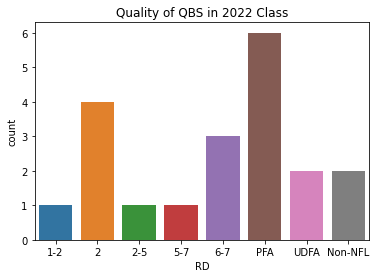

In [42]:
sns.countplot(data=Qb_2022 , x='RD' )
plt.title('Quality of QBS in 2022 Class')

###  You can see there is no top-tier Talent but there is a lot of quarterbacks you can pick up later in the draft.

Text(0.5, 1.0, 'Quality of QBS in 2021 Class')

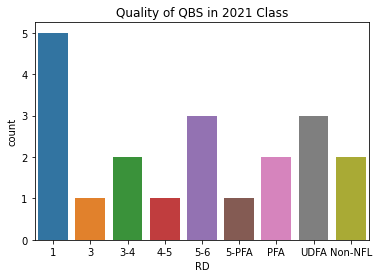

In [43]:
sns.countplot(data=Qb_2021 , x='RD' )
plt.title('Quality of QBS in 2021 Class')

### The hype is Real !! there is a plethora of top tier quarterbacks

Text(0.5, 1.0, 'Quality of QBS in 2020 Class')

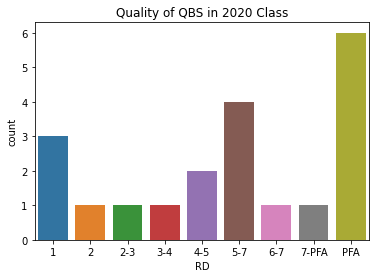

In [44]:
sns.countplot(data=Qb_2020 , x='RD' )
plt.title('Quality of QBS in 2020 Class')

### There is a lot of priority free agents also there three first-round quarterbacks

## We can see why there is a hype on the 2021 class, compared to the rest it has five round 1 quarterbacks probably that is an outlier that will happen once in a blue moon

Text(0.5, 1.0, 'Potential in terms of impact of QBS in 2022 class')

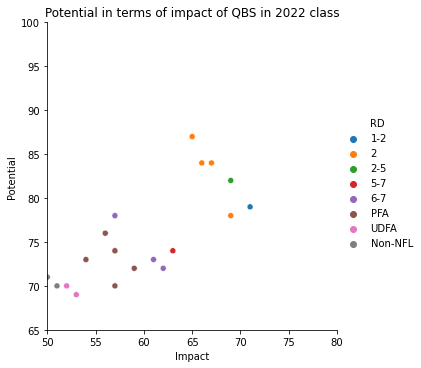

In [45]:
sns.relplot(y="POT", x="IMP" , hue='RD',data=Qb_2022)
plt.xlim(50, 80)
plt.ylim(65, 100)
plt.xlabel('Impact')
plt.ylabel('Potential')
plt.title('Potential in terms of impact of QBS in 2022 class')

### We can say that the 2022 draft class was the weakest we seen in recent memory

Text(0.5, 1.0, 'Potential in terms of impact of QBS in 2021 class')

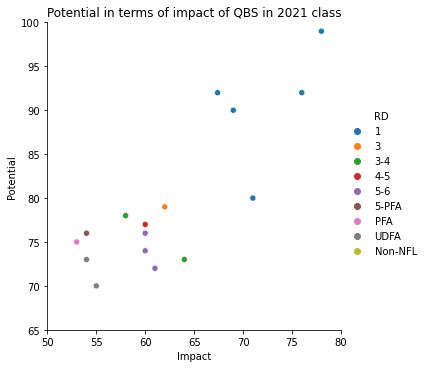

In [46]:
sns.relplot(y="POT", x="IMP" , hue='RD',data=Qb_2021)
plt.xlim(50, 80)
plt.ylim(65, 100)
plt.xlabel('Impact')
plt.ylabel('Potential')
plt.title('Potential in terms of impact of QBS in 2021 class')

### We can see that five quarterbacks have established themselves as the best in the class in terms of impact, and four of the five QBS have enormous potential (Mac is the excluded player out of the five quarterbacks)

Text(0.5, 1.0, 'Potential in terms of impact of QBS in 2020 class')

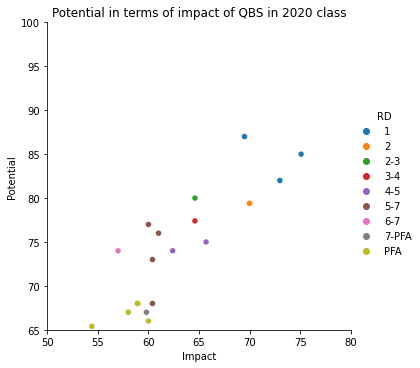

In [47]:
sns.relplot(y="POT", x="IMP" , hue='RD',data=Qb_2020)
plt.xlim(50, 80)
plt.ylim(65, 100)
plt.xlabel('Impact')
plt.ylabel('Potential')
plt.title('Potential in terms of impact of QBS in 2020 class')

## We can See Clearly that's the potential and impact of a player are proportionate to the round they get picked in

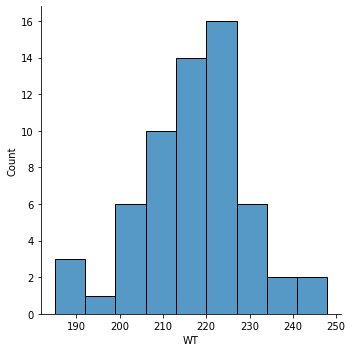

In [48]:
sns.displot(df['WT'])

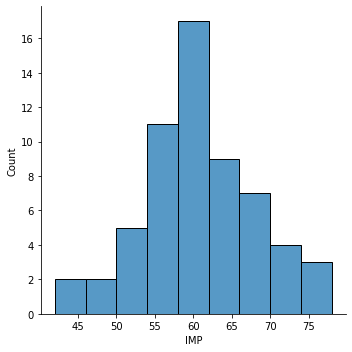

In [49]:
sns.displot(df['IMP'])

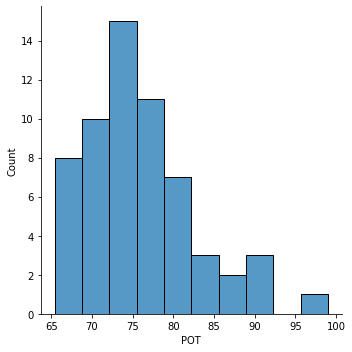

In [50]:
sns.displot(df['POT'])

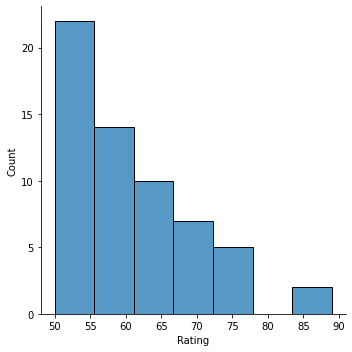

In [51]:
sns.displot(df['Rating'])

Text(0.5, 1.0, 'Impact in terms of DEC & PRS for QBS in 2022 class')

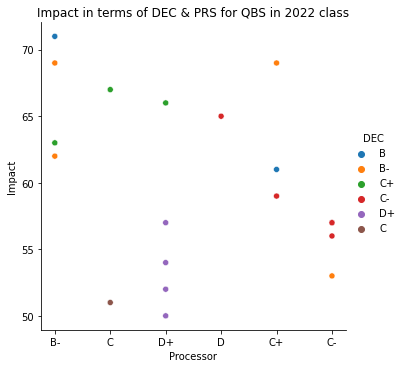

In [52]:
sns.relplot(y="IMP", x="PRS" , hue='DEC' ,data=Qb_2022)

plt.xlabel('Processor')
plt.ylabel('Impact')
plt.title('Impact in terms of DEC & PRS for QBS in 2022 class')

Text(0.5, 1.0, 'Impact in terms of DEC & PRS for QBS in 2021 class')

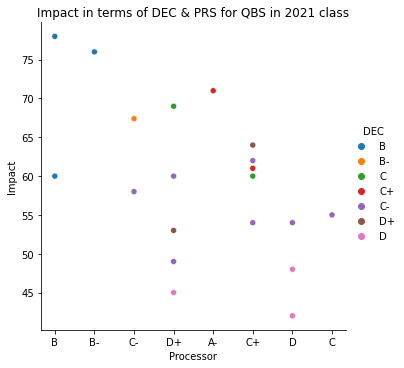

In [53]:
sns.relplot(y="IMP", x="PRS" , hue='DEC' ,data=Qb_2021)

plt.xlabel('Processor')
plt.ylabel('Impact')
plt.title('Impact in terms of DEC & PRS for QBS in 2021 class')

Text(0.5, 1.0, 'Impact in terms of DEC & PRS for QBS in 2022 class')

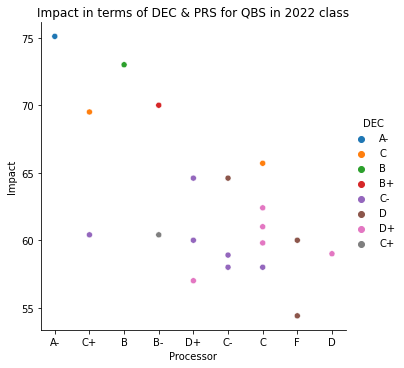

In [54]:
sns.relplot(y="IMP", x="PRS" , hue='DEC' ,data=Qb_2020)

plt.xlabel('Processor')
plt.ylabel('Impact')
plt.title('Impact in terms of DEC & PRS for QBS in 2022 class')

## Based on the three draft classes we can say if a QB has a good Processor and decision making he will have a good Impact 

Text(0.5, 1.0, 'POT of the QBs in trams of draft captal ')

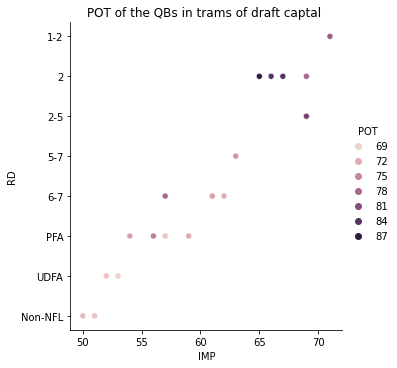

In [55]:
sns.relplot(y="RD", x="IMP", hue="POT", data=Qb_2022)


plt.title('POT of the QBs in trams of draft captal ')

Text(0.5, 1.0, 'POT of the QBs in trams of draft captal ')

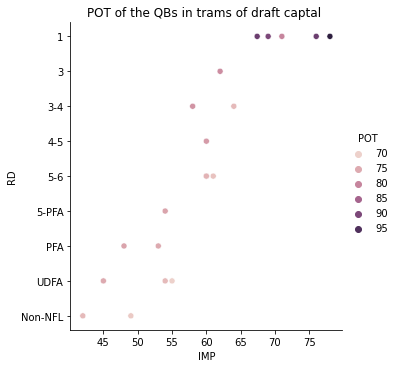

In [56]:
sns.relplot(y="RD", x="IMP", hue="POT", data=Qb_2021)


plt.title('POT of the QBs in trams of draft captal ')

Text(0.5, 1.0, 'POT of the QBs in trams of draft captal ')

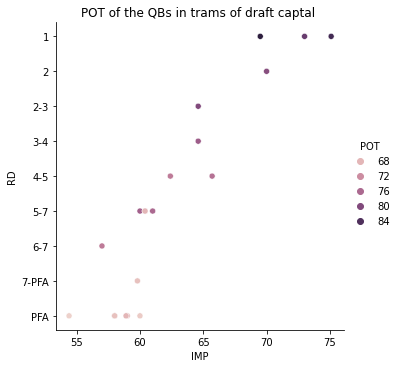

In [57]:
sns.relplot(y="RD", x="IMP", hue="POT", data=Qb_2020)


plt.title('POT of the QBs in trams of draft captal ')

<AxesSubplot:xlabel='PRS', ylabel='IMP'>

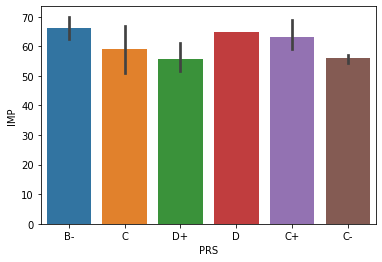

In [58]:
sns.barplot(data=Qb_2022 , y='IMP' , x='PRS')

<AxesSubplot:xlabel='DEC', ylabel='IMP'>

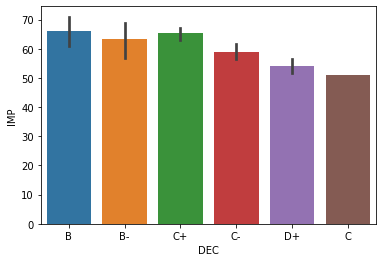

In [59]:
sns.barplot(data=Qb_2022 , y='IMP' , x='DEC')

<AxesSubplot:xlabel='PKS', ylabel='IMP'>

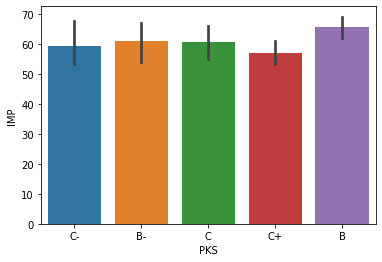

In [60]:
sns.barplot(data=Qb_2022 , y='IMP' , x='PKS')

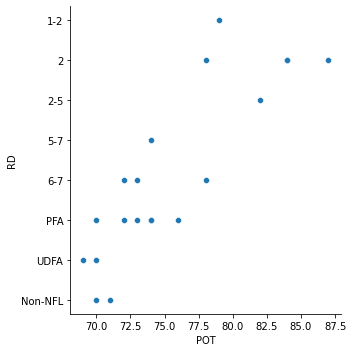

In [61]:
sns.relplot(y="RD", x="POT",data=Qb_2022)

<AxesSubplot:xlabel='RD', ylabel='IMP'>

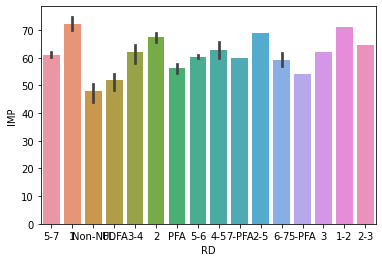

In [62]:
sns.barplot(data=df , y='IMP' , x='RD')

<AxesSubplot:xlabel='RD', ylabel='IMP'>

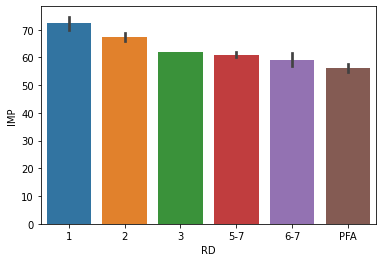

In [63]:
R1 = df[df['RD']=='1']
R2 = df[df['RD']=='2']
R3 = df[df['RD']=='3']
R35 = df[df['RD']=='3-5']
R57 = df[df['RD']=='5-7']
R67 = df[df['RD']=='6-7']
PFA = df[df['RD']=='PFA']

frames = [R1,R2,R3,R35 , R57 , R67 , PFA]
RD_orderd = pd.concat(frames)



sns.barplot(data=RD_orderd , y='IMP' , x='RD')


<AxesSubplot:xlabel='RD', ylabel='POT'>

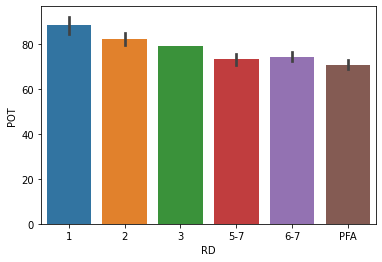

In [64]:
sns.barplot(data=RD_orderd , y='POT' , x='RD')

In [65]:
df.head(1)

,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,DEC,PKS,PEX,REL,SPD,COD,ACC,Description,Injury History,Rating
0,7.0,Bailey Zappe,6'3,213.0,SR (GR),Western Kentucky,5.95,63.0,74.0,5-7,...,C+,B-,C+,B+,76.0,77.0,78.0,Zappe is a prototype backup Quarterback. He ha...,No,63.0


In [66]:
# use apply and lambda to konw the number of words in the Description for each player 
num_words_in_Description = df.apply(
         lambda row:  len(row['Description']),
         axis=1)

# Create a new feature word_count
df['Word_count'] = num_words_in_Description
print(df)

    Ranking               Name      HT     WT       Class            School  \
0       7.0       Bailey Zappe     6'3  213.0     SR (GR)  Western Kentucky   
1       1.0         Joe Burrow     6'4  216.0     SR (RS)               LSU   
2       4.0      Justin Fields     6'3  227.0          JR        Ohio State   
3      20.0  McKenzie Milton +    5'10  190.0  SR (RS x2)     Florida State   
4      17.0        Collin Hill     6'4  213.0     SR (GR)    South Carolina   
5      19.0         Zac Thomas     6'1  205.0     SR (RS)         App State   
6       7.0        Davis Mills     6'4  220.0          SR          Stanford   
7       5.0       Malik Willis     6'0  220.0     JR (RS)           Liberty   
8      20.0       Noah Johnson    5'10  199.0     SR (GR)               USF   
9      16.0        Dustin Crum     6'3  207.0     SR (GR)        Kent State   
10     19.0     Chris Oladokun     6'2  200.0     SR (GR)  South Dakota St.   
11     14.0       Sam Ehlinger     6'1  220.0       

## Now we will see the readability score of the text in the Description feature      

In [67]:
# Import Textatistic
from textatistic import Textatistic

# adding a new column with the readability scores of the text using textatistic flesch_score  
df['Flesch_Score'] = df['Description'].apply(lambda x: (Textatistic(x).scores) ['flesch_score'])

In [68]:
df.describe()

,Ranking,WT,OVR,IMP,POT,SPD,COD,ACC,Rating,Word_count,Flesch_Score
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,10.500000,216.016667,25.915500,60.570000,75.953333,80.200000,78.650000,83.133333,60.166667,874.100000,68.606665
std,5.814943,12.050025,28.930606,7.492398,6.958411,4.704127,5.937028,4.938492,9.725324,447.266602,8.041873
min,1.000000,185.000000,4.400000,42.000000,65.400000,69.000000,62.000000,68.000000,50.000000,307.000000,40.903607
25%,5.750000,209.500000,5.587500,56.750000,71.750000,76.000000,74.000000,79.750000,50.000000,546.750000,63.813258
50%,10.500000,215.000000,6.235000,60.000000,74.500000,81.500000,79.500000,84.500000,59.000000,771.500000,68.679923
75%,15.250000,223.250000,62.000000,65.175000,79.000000,84.000000,83.000000,87.000000,65.250000,1062.750000,72.945077
max,20.000000,248.000000,78.400000,78.000000,99.000000,89.000000,89.000000,90.000000,89.000000,2387.000000,90.330714


## We can observe what the mean of the readability score is 68.6 which 13 to 15 year olds can understand the description
<img src="Flesch.jpg." width="800" height="400">


In [69]:
df.head()

,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,PEX,REL,SPD,COD,ACC,Description,Injury History,Rating,Word_count,Flesch_Score
0,7.0,Bailey Zappe,6'3,213.0,SR (GR),Western Kentucky,5.95,63.0,74.0,5-7,...,C+,B+,76.0,77.0,78.0,Zappe is a prototype backup Quarterback. He ha...,No,63.0,561,73.083455
1,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.40,75.1,85.0,1,...,A,A,82.0,83.0,90.0,"Burrow is a confident, quick twitch gunslinger...",No,89.0,992,73.310620
2,4.0,Justin Fields,6'3,227.0,JR,Ohio State,6.51,69.0,90.0,1,...,A-,B,88.0,86.0,89.0,Fields is a typical boom or bust 1st Round Qua...,No,74.0,1838,68.888214
3,20.0,McKenzie Milton +,5'10,190.0,SR (RS x2),Florida State,4.80,51.0,70.0,Non-NFL,...,B-,B,83.0,82.0,84.0,Milton is a great story but it feels as though...,Yes,51.0,410,65.842620
4,17.0,Collin Hill,6'4,213.0,SR (GR),South Carolina,5.15,54.0,73.0,UDFA,...,C+,B-,73.0,72.0,80.0,Hill transferred to the SEC after losing his S...,No,50.0,591,68.471631


In [70]:
# Remove stopwords for the dataframe 
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Description'] = df['Description'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
df.head(1)


,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,PEX,REL,SPD,COD,ACC,Description,Injury History,Rating,Word_count,Flesch_Score
0,7.0,Bailey Zappe,6'3,213.0,SR (GR),Western Kentucky,5.95,63.0,74.0,5-7,...,C+,B+,76.0,77.0,78.0,Zappe prototype backup Quarterback. He lots ex...,No,63.0,561,73.083455


In [71]:
# Remove stopwords for the QB_2022 dataframe 
from nltk.corpus import stopwords
stop = stopwords.words('english')
Qb_2022['Description'] = Qb_2022['Description'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
Qb_2022.head(1)


,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,DEC,PKS,PEX,REL,SPD,COD,ACC,Description,Injury History,Rating
0,1,Kenny Pickett,6'3,217,SR (RS),Pittsburgh,6.35,71,79,1-2,...,B,C-,B+,B+,84,82,86,Pickett projects nicely mid tier Quarterback b...,No,71


In [72]:
# Remove stopwords for the QB_2021 dataframe 
from nltk.corpus import stopwords
stop = stopwords.words('english')
Qb_2021['Description'] = Qb_2021['Description'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
Qb_2021.head(1)


,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,DEC,PKS,PEX,REL,SPD,COD,ACC,Description,Injury History,Rating
0,1.0,Trevor Lawrence,6'6,215.0,JR,Clemson,7.18,78.0,99.0,1,...,B,B-,A-,A-,87.0,76.0,82.0,Lawrence true generational talent Quarterback ...,No,76.0


In [73]:
# Remove stopwords for the QB_2020 dataframe 
from nltk.corpus import stopwords
stop = stopwords.words('english')
Qb_2020['Description'] = Qb_2020['Description'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
Qb_2020.head(1)


,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,DEC,PKS,PEX,REL,SPD,COD,ACC,Description,Injury History,Rating
0,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.4,75.1,85.0,1,...,A-,A-,A,A,82.0,83.0,90.0,"Burrow confident, quick twitch gunslinger type...",No,89.0


In [74]:
import spacy

# Loading the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 1027203

# Generate tokens and POS tags
pos = df['Description'].apply(lambda x: ([(token.text, token.pos_) for token in nlp(x)]))


                             
print(pos.head())

0    [(Zappe, ADJ), (prototype, NOUN), (backup, NOU...
1    [(Burrow, PROPN), (confident, ADJ), (,, PUNCT)...
2    [(Fields, NOUN), (typical, ADJ), (boom, NOUN),...
3    [(Milton, PROPN), (great, ADJ), (story, NOUN),...
4    [(Hill, PROPN), (transferred, VERB), (SEC, PRO...
Name: Description, dtype: object


In [75]:
# Returns the number of word type 
def wordtype(text,WordType, model=nlp ):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos_A = [token.pos_ for token in doc]
    
    # Return number of word type
    return pos_A.count(WordType)

In [76]:
# casting the pos to str 
pos = ' '.join([str(item) for item in pos])
print(wordtype(pos, 'VERB', nlp)) # you can try any type like PROPN or Noun.ect

887


In [77]:
pos

'[(\'Zappe\', \'ADJ\'), (\'prototype\', \'NOUN\'), (\'backup\', \'NOUN\'), (\'Quarterback\', \'PROPN\'), (\'.\', \'PUNCT\'), (\'He\', \'PRON\'), (\'lots\', \'VERB\'), (\'experience\', \'NOUN\'), (\',\', \'PUNCT\'), (\'operates\', \'VERB\'), (\'quickly\', \'ADV\'), (\',\', \'PUNCT\'), (\'identifies\', \'VERB\'), (\'coverages\', \'NOUN\'), (\'well\', \'ADV\'), (\',\', \'PUNCT\'), (\'generally\', \'ADV\'), (\'makes\', \'VERB\'), (\'smart\', \'ADJ\'), (\'decisions\', \'NOUN\'), (\'football\', \'NOUN\'), (\'.\', \'PUNCT\'), (\'He\', \'PRON\'), (\'comfortable\', \'ADJ\'), (\'rush\', \'NOUN\'), (\'navigates\', \'VERB\'), (\'pocket\', \'NOUN\'), (\'well\', \'ADV\'), (\'needs\', \'VERB\'), (\'to\', \'PART\'), (\'.\', \'PUNCT\'), (\'He\', \'PRON\'), (\'obvious\', \'ADJ\'), (\'limitations\', \'NOUN\'), (\'arm\', \'VERB\'), (\'general\', \'ADJ\'), (\'athlete\', \'NOUN\'), (\'shrink\', \'NOUN\'), (\'field\', \'NOUN\'), (\'types\', \'NOUN\'), (\'plays\', \'VERB\'), (\'call\', \'VERB\'), (\'him\', \'

In [78]:
# Generate tokens and POS tags for each description
df['POS_Description'] = df['Description'].apply(lambda x: ([(token.text, token.pos_) for token in nlp(x)]))

In [79]:
# Counting how many verbs in each description
df['Adjective_count'] = df['POS_Description'].apply(lambda x: ([wordtype((' '.join([str(item) for item in x])), 'VERB', nlp)]))

In [80]:
df

,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,SPD,COD,ACC,Description,Injury History,Rating,Word_count,Flesch_Score,POS_Description,Adjective_count
0,7.0,Bailey Zappe,6'3,213.0,SR (GR),Western Kentucky,5.95,63.0,74.0,5-7,...,76.0,77.0,78.0,Zappe prototype backup Quarterback. He lots ex...,No,63.0,561,73.083455,"[(Zappe, ADJ), (prototype, NOUN), (backup, NOU...",[7]
1,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.40,75.1,85.0,1,...,82.0,83.0,90.0,"Burrow confident, quick twitch gunslinger type...",No,89.0,992,73.310620,"[(Burrow, PROPN), (confident, ADJ), (,, PUNCT)...",[13]
2,4.0,Justin Fields,6'3,227.0,JR,Ohio State,6.51,69.0,90.0,1,...,88.0,86.0,89.0,Fields typical boom bust 1st Round Quarterback...,No,74.0,1838,68.888214,"[(Fields, NOUN), (typical, ADJ), (boom, NOUN),...",[37]
3,20.0,McKenzie Milton +,5'10,190.0,SR (RS x2),Florida State,4.80,51.0,70.0,Non-NFL,...,83.0,82.0,84.0,Milton great story feels though football journ...,Yes,51.0,410,65.842620,"[(Milton, PROPN), (great, ADJ), (story, NOUN),...",[7]
4,17.0,Collin Hill,6'4,213.0,SR (GR),South Carolina,5.15,54.0,73.0,UDFA,...,73.0,72.0,80.0,Hill transferred SEC losing Senior season due ...,No,50.0,591,68.471631,"[(Hill, PROPN), (transferred, VERB), (SEC, PRO...",[12]
5,19.0,Zac Thomas,6'1,205.0,SR (RS),App State,4.90,49.0,71.0,Non-NFL,...,85.0,82.0,87.0,Thomas tough sell NFL prospect. He funky relea...,No,50.0,464,72.931164,"[(Thomas, PROPN), (tough, ADJ), (sell, VERB), ...",[10]
6,7.0,Davis Mills,6'4,220.0,SR,Stanford,6.05,58.0,78.0,3-4,...,79.0,78.0,84.0,Mills traitsy quarterback lack experience play...,No,65.0,561,74.987824,"[(Mills, NOUN), (traitsy, VERB), (quarterback,...",[8]
7,5.0,Malik Willis,6'0,220.0,JR (RS),Liberty,6.25,65.0,87.0,2,...,89.0,88.0,90.0,Willis definition boom bust Quarterback. He bu...,No,65.0,739,67.238144,"[(Willis, PROPN), (definition, NOUN), (boom, N...",[9]
8,20.0,Noah Johnson,5'10,199.0,SR (GR),USF,4.40,42.0,73.0,Non-NFL,...,80.0,78.0,83.0,"*Incomplete eval, film available. Noah Johnson...",No,50.0,421,79.602301,"[(*, PUNCT), (Incomplete, ADJ), (eval, NOUN), ...",[8]
9,16.0,Dustin Crum,6'3,207.0,SR (GR),Kent State,5.30,57.0,70.0,PFA,...,82.0,77.0,81.0,Crum experienced potential NFL backup put good...,No,57.0,806,70.919035,"[(Crum, PROPN), (experienced, VERB), (potentia...",[16]


# Sentiment Analysis



<img src="Sentiment-Analysis.jpg" width="800" height="400">


###  For this, section we will train a model on a diffrernt Data frame which contains the pff description on players of previous draft classes. 

### Pro Football Focus (often referred to by its initials, PFF)
<img src="PFF.jpg" width="800" height="400">

### PFF is a sports analytics company that focuses on thorough analysis of the National Football League (NFL) and NCAA 

In [81]:
# Get a pandas DataFrame object of all the data in the csv file:
D_Descriptions = pd.read_csv('TFG/Draft_Description.csv')

# Get pandas Series object of the "tweet text" column:
text = D_Descriptions['Description']

# Get pandas Series object of the "emotion" column:
target = D_Descriptions['Label']


# Remove the blank rows from the series:
target = target[pd.notnull(text)]
text = text[pd.notnull(text)]

# Perform feature extraction:

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
count_vect = CountVectorizer()

# Fit X_train
count_vect.fit(text)

# Transform X_train
counts = count_vect.transform(text)

# Train with this data with a Naive Bayes classifier:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(counts, target)



MultinomialNB()

In [82]:
# test the model  
pos = "Murray was the highest-graded QB in college football this past season. We haven't seen a quarterback that is as dangerous with both his arm and legs since Russell Wilson."
neg = "Finley lacks the type of arm strength most would like to see at the NFL level, but throw for throw he's one of the most accurate QBs in the class."
Neu = "Trask balled out in the loaded Florida offense this past season. He led the country with 41 big-time throws. He’s not particularly toolsy, but he is exceptional at working from the pocket and making big plays."


In [83]:
#Try the classifier
print(nb.predict(count_vect.transform([pos])))

['Postive']


In [84]:
#Try the classifier
print(nb.predict(count_vect.transform([neg])))

['Negative']


In [85]:
#Try the classifier str(int_a)
print(nb.predict(count_vect.transform([Neu])))

['Neutral']


# Feature Engineering

In [86]:
df.head()

,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,SPD,COD,ACC,Description,Injury History,Rating,Word_count,Flesch_Score,POS_Description,Adjective_count
0,7.0,Bailey Zappe,6'3,213.0,SR (GR),Western Kentucky,5.95,63.0,74.0,5-7,...,76.0,77.0,78.0,Zappe prototype backup Quarterback. He lots ex...,No,63.0,561,73.083455,"[(Zappe, ADJ), (prototype, NOUN), (backup, NOU...",[7]
1,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.40,75.1,85.0,1,...,82.0,83.0,90.0,"Burrow confident, quick twitch gunslinger type...",No,89.0,992,73.310620,"[(Burrow, PROPN), (confident, ADJ), (,, PUNCT)...",[13]
2,4.0,Justin Fields,6'3,227.0,JR,Ohio State,6.51,69.0,90.0,1,...,88.0,86.0,89.0,Fields typical boom bust 1st Round Quarterback...,No,74.0,1838,68.888214,"[(Fields, NOUN), (typical, ADJ), (boom, NOUN),...",[37]
3,20.0,McKenzie Milton +,5'10,190.0,SR (RS x2),Florida State,4.80,51.0,70.0,Non-NFL,...,83.0,82.0,84.0,Milton great story feels though football journ...,Yes,51.0,410,65.842620,"[(Milton, PROPN), (great, ADJ), (story, NOUN),...",[7]
4,17.0,Collin Hill,6'4,213.0,SR (GR),South Carolina,5.15,54.0,73.0,UDFA,...,73.0,72.0,80.0,Hill transferred SEC losing Senior season due ...,No,50.0,591,68.471631,"[(Hill, PROPN), (transferred, VERB), (SEC, PRO...",[12]


In [87]:
# Generate tokens and POS tags for each description
df['SA'] = df['Description'].apply(lambda x: nb.predict(count_vect.transform([x])))

In [88]:
df.head()

,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,COD,ACC,Description,Injury History,Rating,Word_count,Flesch_Score,POS_Description,Adjective_count,SA
0,7.0,Bailey Zappe,6'3,213.0,SR (GR),Western Kentucky,5.95,63.0,74.0,5-7,...,77.0,78.0,Zappe prototype backup Quarterback. He lots ex...,No,63.0,561,73.083455,"[(Zappe, ADJ), (prototype, NOUN), (backup, NOU...",[7],[Postive]
1,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.40,75.1,85.0,1,...,83.0,90.0,"Burrow confident, quick twitch gunslinger type...",No,89.0,992,73.310620,"[(Burrow, PROPN), (confident, ADJ), (,, PUNCT)...",[13],[Postive]
2,4.0,Justin Fields,6'3,227.0,JR,Ohio State,6.51,69.0,90.0,1,...,86.0,89.0,Fields typical boom bust 1st Round Quarterback...,No,74.0,1838,68.888214,"[(Fields, NOUN), (typical, ADJ), (boom, NOUN),...",[37],[Postive]
3,20.0,McKenzie Milton +,5'10,190.0,SR (RS x2),Florida State,4.80,51.0,70.0,Non-NFL,...,82.0,84.0,Milton great story feels though football journ...,Yes,51.0,410,65.842620,"[(Milton, PROPN), (great, ADJ), (story, NOUN),...",[7],[Neutral]
4,17.0,Collin Hill,6'4,213.0,SR (GR),South Carolina,5.15,54.0,73.0,UDFA,...,72.0,80.0,Hill transferred SEC losing Senior season due ...,No,50.0,591,68.471631,"[(Hill, PROPN), (transferred, VERB), (SEC, PRO...",[12],[Postive]


In [89]:
# Fix the columns to the correct type 
df['SA'] = df['SA'].apply(lambda x: x[0])
df['Adjective_count'] = df['Adjective_count'].apply(lambda x: x[0])

In [90]:
df.head()

,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,COD,ACC,Description,Injury History,Rating,Word_count,Flesch_Score,POS_Description,Adjective_count,SA
0,7.0,Bailey Zappe,6'3,213.0,SR (GR),Western Kentucky,5.95,63.0,74.0,5-7,...,77.0,78.0,Zappe prototype backup Quarterback. He lots ex...,No,63.0,561,73.083455,"[(Zappe, ADJ), (prototype, NOUN), (backup, NOU...",7,Postive
1,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.40,75.1,85.0,1,...,83.0,90.0,"Burrow confident, quick twitch gunslinger type...",No,89.0,992,73.310620,"[(Burrow, PROPN), (confident, ADJ), (,, PUNCT)...",13,Postive
2,4.0,Justin Fields,6'3,227.0,JR,Ohio State,6.51,69.0,90.0,1,...,86.0,89.0,Fields typical boom bust 1st Round Quarterback...,No,74.0,1838,68.888214,"[(Fields, NOUN), (typical, ADJ), (boom, NOUN),...",37,Postive
3,20.0,McKenzie Milton +,5'10,190.0,SR (RS x2),Florida State,4.80,51.0,70.0,Non-NFL,...,82.0,84.0,Milton great story feels though football journ...,Yes,51.0,410,65.842620,"[(Milton, PROPN), (great, ADJ), (story, NOUN),...",7,Neutral
4,17.0,Collin Hill,6'4,213.0,SR (GR),South Carolina,5.15,54.0,73.0,UDFA,...,72.0,80.0,Hill transferred SEC losing Senior season due ...,No,50.0,591,68.471631,"[(Hill, PROPN), (transferred, VERB), (SEC, PRO...",12,Postive


In [91]:
df

,Ranking,Name,HT,WT,Class,School,OVR,IMP,POT,RD,...,COD,ACC,Description,Injury History,Rating,Word_count,Flesch_Score,POS_Description,Adjective_count,SA
0,7.0,Bailey Zappe,6'3,213.0,SR (GR),Western Kentucky,5.95,63.0,74.0,5-7,...,77.0,78.0,Zappe prototype backup Quarterback. He lots ex...,No,63.0,561,73.083455,"[(Zappe, ADJ), (prototype, NOUN), (backup, NOU...",7,Postive
1,1.0,Joe Burrow,6'4,216.0,SR (RS),LSU,78.40,75.1,85.0,1,...,83.0,90.0,"Burrow confident, quick twitch gunslinger type...",No,89.0,992,73.310620,"[(Burrow, PROPN), (confident, ADJ), (,, PUNCT)...",13,Postive
2,4.0,Justin Fields,6'3,227.0,JR,Ohio State,6.51,69.0,90.0,1,...,86.0,89.0,Fields typical boom bust 1st Round Quarterback...,No,74.0,1838,68.888214,"[(Fields, NOUN), (typical, ADJ), (boom, NOUN),...",37,Postive
3,20.0,McKenzie Milton +,5'10,190.0,SR (RS x2),Florida State,4.80,51.0,70.0,Non-NFL,...,82.0,84.0,Milton great story feels though football journ...,Yes,51.0,410,65.842620,"[(Milton, PROPN), (great, ADJ), (story, NOUN),...",7,Neutral
4,17.0,Collin Hill,6'4,213.0,SR (GR),South Carolina,5.15,54.0,73.0,UDFA,...,72.0,80.0,Hill transferred SEC losing Senior season due ...,No,50.0,591,68.471631,"[(Hill, PROPN), (transferred, VERB), (SEC, PRO...",12,Postive
5,19.0,Zac Thomas,6'1,205.0,SR (RS),App State,4.90,49.0,71.0,Non-NFL,...,82.0,87.0,Thomas tough sell NFL prospect. He funky relea...,No,50.0,464,72.931164,"[(Thomas, PROPN), (tough, ADJ), (sell, VERB), ...",10,Negative
6,7.0,Davis Mills,6'4,220.0,SR,Stanford,6.05,58.0,78.0,3-4,...,78.0,84.0,Mills traitsy quarterback lack experience play...,No,65.0,561,74.987824,"[(Mills, NOUN), (traitsy, VERB), (quarterback,...",8,Postive
7,5.0,Malik Willis,6'0,220.0,JR (RS),Liberty,6.25,65.0,87.0,2,...,88.0,90.0,Willis definition boom bust Quarterback. He bu...,No,65.0,739,67.238144,"[(Willis, PROPN), (definition, NOUN), (boom, N...",9,Neutral
8,20.0,Noah Johnson,5'10,199.0,SR (GR),USF,4.40,42.0,73.0,Non-NFL,...,78.0,83.0,"*Incomplete eval, film available. Noah Johnson...",No,50.0,421,79.602301,"[(*, PUNCT), (Incomplete, ADJ), (eval, NOUN), ...",8,Postive
9,16.0,Dustin Crum,6'3,207.0,SR (GR),Kent State,5.30,57.0,70.0,PFA,...,77.0,81.0,Crum experienced potential NFL backup put good...,No,57.0,806,70.919035,"[(Crum, PROPN), (experienced, VERB), (potentia...",16,Postive


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ranking          60 non-null     float64
 1   Name             60 non-null     object 
 2   HT               60 non-null     object 
 3   WT               60 non-null     float64
 4   Class            60 non-null     object 
 5   School           60 non-null     object 
 6   OVR              60 non-null     float64
 7   IMP              60 non-null     float64
 8   POT              60 non-null     float64
 9   RD               60 non-null     object 
 10  Scheme           60 non-null     object 
 11  ARM              60 non-null     object 
 12  QAC              60 non-null     object 
 13  IAC              60 non-null     object 
 14  OPA              60 non-null     object 
 15  PRS              60 non-null     object 
 16  DEC              60 non-null     object 
 17  PKS              6

## We decided to classifieds School columns to big school or not because mostly players come from big schools in that position


In [93]:
# List of the best football progams in the NCAA
big_schools = [
    
    'Texas','Clemson','Notre Dame','Ohio State','LSU','Florida',
    'Georgia','Alabama','South Carolina','Florida State','Oklahoma'
    
              ]

In [94]:
# to check if the school inside the list of big schools 
in_big_schools = df['School'].isin(big_schools)

In [95]:
# Create a new feature word_count
df['School'] = in_big_schools

In [96]:
# Renaming the columns to make them more easily identifiable
df.rename(columns = {
    
                    'School':'Big Program'
                 },
          
          
               inplace = True)

In [97]:
df['Scheme'].value_counts()

Spread                      12
Play Action                 12
Any                          8
Play Action / Spread         7
Spread / Play Action         6
Pro Style                    4
Pro Style / Play Action      4
Pro Style / Spread           2
Pro Styler / Play Action     1
Spead / Play Action          1
Spread / Pro Style           1
Spead / Pro Style            1
Play Action / Pro Style      1
Name: Scheme, dtype: int64

### We decided to make it only three types of schemes in the NFL play_Action, Spread, Pro Style or Any Scheme.

In [98]:
# this fun

def typeofScheme(scheme):
    
   
    scheme = scheme.split("/") [0].strip()
    
    
    play_action = 'Play Action'
    spread = 'Spread'
    pro_style = 'Pro Style'
    
    if scheme == play_action:
        return play_action
    
    if scheme == spread:
        return spread
    
    if scheme == pro_style:
        return pro_style
    
    else:
        return 'any'

In [99]:
# fix the scheme column useing the Scheme function
df['Scheme'] = df['Scheme'].apply(lambda x: typeofScheme(x) )

In [100]:
df['Scheme'].value_counts()

Play Action    20
Spread         19
any            11
Pro Style      10
Name: Scheme, dtype: int64

In [187]:
df['HT'] = df['HT'].apply()

0        6'3
1        6'4
2        6'3
3       5'10
4        6'4
5        6'1
6        6'4
7        6'0
8       5'10
9        6'3
10       6'2
11       6'1
12       6'0
13       6'2
14       6'6
15       6'3
16       6'2
17       6'3
18       6'2
19       6'1
20      5'11
21       6'4
22       6'4
23       6'2
24       6'3
25       6'2
26       6'4
27       6'4
28       6'1
29       6'3
30       6'1
31       6'2
32       6'4
33       6'3
34       6'2
35       6'5
36       6'6
37       6'6
38       6'3
39       6'3
40       6'5
41       6'2
42    6'6.5"
43       5'9
44       6'4
45       6'0
46       6'3
47       6'1
48       6'3
49       6'5
50       6'3
51       6'3
52       6'2
53       6'5
54       6'1
55       6'2
56       6'6
57      5'10
58       6'0
59       6'6
Name: HT, dtype: object

In [ ]:
sasasas

In [101]:
# import required libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder



categories = ['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F',]
SA_categories   =   ['Postive','Neutral','Negative']



# generate values using Ordinal Encoder ordering the vaules based on the provided list
oe = OrdinalEncoder(categories = [['1','1-2','2','2-3','2-4','2-5','3','3-4','3-5','4','4-5','4-6','4-7','5','5-6','5-7',
                                   '5-PFA','6','6-7','7','7-PFA','PFA','UDFA','Non-NFL']
                                  ,categories
                                  ,categories
                                  ,categories
                                  ,categories
                                  ,categories
                                  ,categories
                                  ,categories
                                  ,categories
                                  ,categories
                                  ,SA_categories])


# assigning the features to the values
df[['RD','ARM','IAC','QAC','OPA','PRS','DEC','PKS','PEX','REL','SA']] = oe.fit_transform(df[['RD','ARM','IAC','QAC','OPA',
                                                                                        'PRS','DEC','PKS','PEX','REL','SA']])


In [102]:
# generate binary values using get_dummies
df = pd.get_dummies(df, columns=['Injury History'], drop_first=True, prefix='Inj_History')

df = pd.get_dummies(df, columns=['Big Program'], drop_first=True, prefix='Big_Program')

df = pd.get_dummies(df, columns=['Scheme'])#, drop_first=True, prefix='Scheme')

In [103]:
# making a dataframe of the top 3 picks in each draft class
df_top3_picks = df[df['Ranking'] < 4 ]

In [104]:
df_top3_picks.head(3)

,Ranking,Name,HT,WT,Class,OVR,IMP,POT,RD,ARM,...,Flesch_Score,POS_Description,Adjective_count,SA,Inj_History_Yes,Big_Program_True,Scheme_Play Action,Scheme_Pro Style,Scheme_Spread,Scheme_any
1,1.0,Joe Burrow,6'4,216.0,SR (RS),78.4,75.1,85.0,0.0,4.0,...,73.310620,"[(Burrow, PROPN), (confident, ADJ), (,, PUNCT)...",13,0.0,0,1,0,0,0,1
15,2.0,Desmond Ridder,6'3,207.0,SR (RS),6.3,69.0,78.0,2.0,5.0,...,52.795000,"[(Ridder, PROPN), (quick, ADJ), (operating, NO...",8,1.0,0,0,0,0,0,1
32,2.0,Jordan Love,6'4,225.0,JR (RS),75.3,69.5,87.0,0.0,2.0,...,72.671695,"[(Smooth, ADJ), (athlete, NOUN), (exceptional,...",17,0.0,0,0,0,0,0,1


In [105]:
# making a dataframe of the last 3 picks in each draft class
df_last3_picks = df[df['Ranking'] > 17 ]

In [106]:
df_last3_picks.head(3)

,Ranking,Name,HT,WT,Class,OVR,IMP,POT,RD,ARM,...,Flesch_Score,POS_Description,Adjective_count,SA,Inj_History_Yes,Big_Program_True,Scheme_Play Action,Scheme_Pro Style,Scheme_Spread,Scheme_any
3,20.0,McKenzie Milton +,5'10,190.0,SR (RS x2),4.8,51.0,70.0,23.0,9.0,...,65.842620,"[(Milton, PROPN), (great, ADJ), (story, NOUN),...",7,1.0,1,1,0,0,1,0
5,19.0,Zac Thomas,6'1,205.0,SR (RS),4.9,49.0,71.0,23.0,6.0,...,72.931164,"[(Thomas, PROPN), (tough, ADJ), (sell, VERB), ...",10,2.0,0,0,0,0,1,0
8,20.0,Noah Johnson,5'10,199.0,SR (GR),4.4,42.0,73.0,23.0,7.0,...,79.602301,"[(*, PUNCT), (Incomplete, ADJ), (eval, NOUN), ...",8,0.0,0,0,1,0,0,0


In [107]:
df_top3_picks.describe()

,Ranking,WT,OVR,IMP,POT,RD,ARM,QAC,IAC,OPA,...,Word_count,Flesch_Score,Adjective_count,SA,Inj_History_Yes,Big_Program_True,Scheme_Play Action,Scheme_Pro Style,Scheme_Spread,Scheme_any
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000
mean,2.000000,217.222222,29.735556,71.777778,86.444444,0.555556,2.888889,3.222222,4.111111,2.777778,...,1136.444444,63.670165,17.111111,0.333333,0.111111,0.333333,0.222222,0.111111,0.0,0.666667
std,0.866025,5.403188,34.691964,3.946130,6.839428,0.881917,1.452966,2.333333,2.147350,1.855921,...,410.974181,7.737142,6.954215,0.500000,0.333333,0.500000,0.440959,0.333333,0.0,0.500000
min,1.000000,207.000000,6.270000,67.000000,78.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,566.000000,52.795000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.000000,215.000000,6.350000,69.000000,82.000000,0.000000,2.000000,1.000000,3.000000,1.000000,...,984.000000,57.866176,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,2.000000,217.000000,7.100000,71.000000,85.000000,0.000000,3.000000,3.000000,4.000000,3.000000,...,1030.000000,61.712321,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,3.000000,220.000000,74.200000,75.100000,92.000000,1.000000,4.000000,4.000000,6.000000,4.000000,...,1483.000000,72.671695,21.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000
max,3.000000,225.000000,78.400000,78.000000,99.000000,2.000000,5.000000,7.000000,7.000000,6.000000,...,1774.000000,73.669228,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [108]:
df_last3_picks.describe()

,Ranking,WT,OVR,IMP,POT,RD,ARM,QAC,IAC,OPA,...,Word_count,Flesch_Score,Adjective_count,SA,Inj_History_Yes,Big_Program_True,Scheme_Play Action,Scheme_Pro Style,Scheme_Spread,Scheme_any
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.000000
mean,19.000000,206.777778,23.233333,51.155556,69.822222,22.111111,7.111111,6.888889,8.666667,6.222222,...,554.00000,69.640947,8.444444,1.111111,0.111111,0.222222,0.666667,0.0,0.222222,0.111111
std,0.866025,11.893042,27.613267,5.423816,3.079683,0.927961,1.964971,1.536591,1.224745,0.833333,...,200.53678,13.334013,3.711843,0.927961,0.333333,0.440959,0.500000,0.0,0.440959,0.333333
min,18.000000,190.000000,4.400000,42.000000,65.400000,21.000000,3.000000,4.000000,7.000000,5.000000,...,313.00000,40.903607,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,18.000000,199.000000,4.900000,49.000000,67.000000,21.000000,7.000000,7.000000,8.000000,6.000000,...,410.00000,65.842620,7.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,19.000000,205.000000,5.000000,51.000000,70.000000,22.000000,7.000000,7.000000,9.000000,6.000000,...,464.00000,70.404231,8.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000
75%,20.000000,215.000000,58.100000,54.400000,71.000000,23.000000,8.000000,8.000000,10.000000,6.000000,...,688.00000,73.311750,10.000000,2.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000
max,20.000000,225.000000,61.000000,58.000000,75.000000,23.000000,10.000000,9.000000,10.000000,8.000000,...,849.00000,90.330714,16.000000,2.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


###  You can see the mean of the word count and the adj count are higher in the top 3 picks DF . In the word_count the mean doubled form 554 to 1136 word and for the adj _count goes form 8.4 to 17.1 adjective.

In [109]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range = (3,3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(df['Description'].values.astype('U'))

# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

# Print the top 5 sentences in the the description column
print(cv_tri_df.sum().sort_values(ascending=False).head())



Counts_ability sense pressure    9
Counts_arm talent accuracy       6
Counts_pressure extend plays     5
Counts_lack arm talent           5
Counts_read defenses make        4
dtype: int64



### All of the common sentences are all reflected in the dataset as features

    ability sense pressure ----> PKS
    arm talent accuracy    ----> ARM
    pressure extend plays  ----> PEX
    lack arm talent        ----> ARM
    read defenses make     ----> PRS
    
    
### Now we will display a word colud of the most frequent words of the dataset after removing stopwords 

###  What is Word Cloud? is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. 

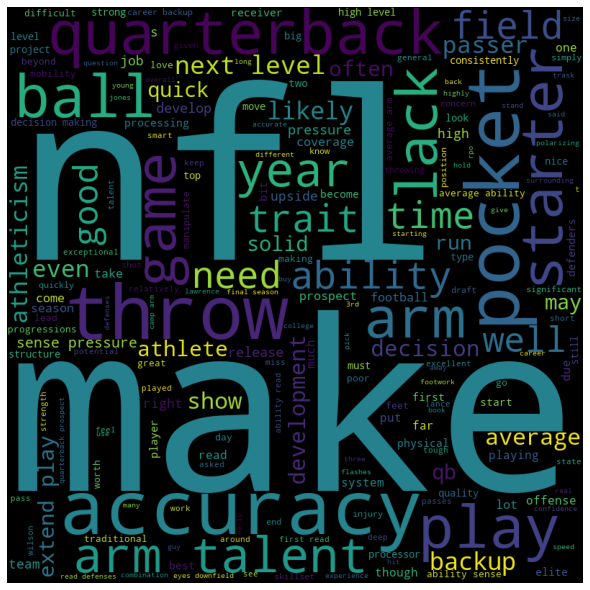

In [110]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

 
comment_words = ''

 
# iterate through the Description column
for val in df.Description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# word cloud for the entier datset 

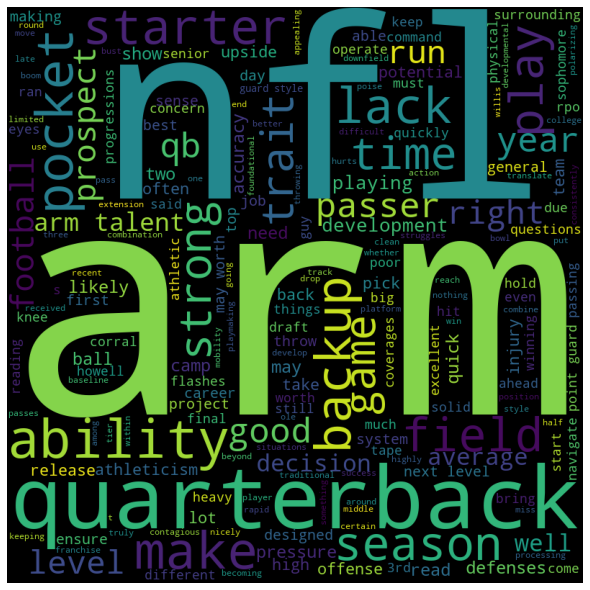

In [111]:

comment_words = ''

# iterate through the Description column
for val in Qb_2022.Description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


# word cloud for the 2022 draft class

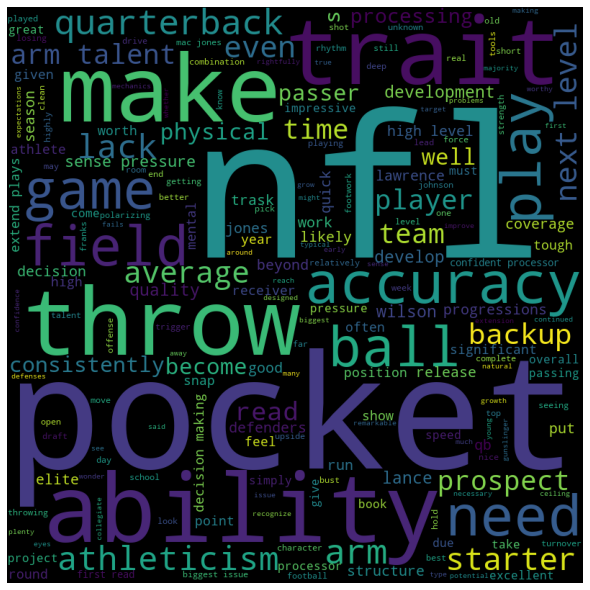

In [112]:
 
comment_words = ''
 
# iterate through the Description column 
for val in Qb_2021.Description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
# word cloud for the 2021 draft class

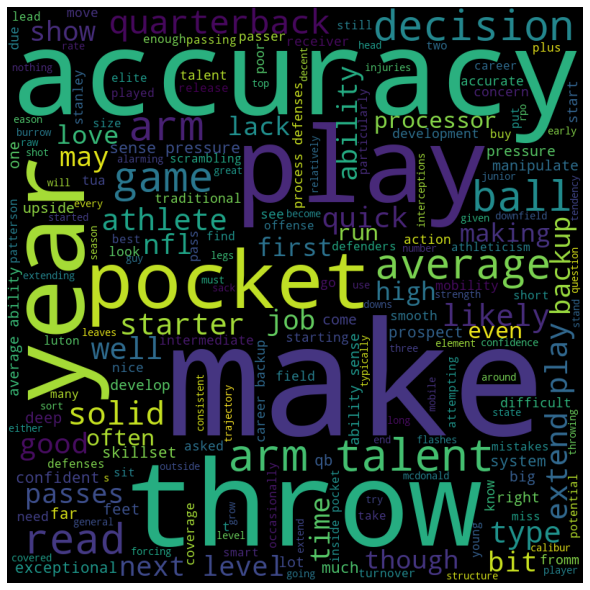

In [113]:
 
comment_words = ''
 
# iterate through the Description column 
for val in Qb_2020.Description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
# word cloud for the 2020 draft class

In [114]:
df

,Ranking,Name,HT,WT,Class,OVR,IMP,POT,RD,ARM,...,Flesch_Score,POS_Description,Adjective_count,SA,Inj_History_Yes,Big_Program_True,Scheme_Play Action,Scheme_Pro Style,Scheme_Spread,Scheme_any
0,7.0,Bailey Zappe,6'3,213.0,SR (GR),5.95,63.0,74.0,15.0,7.0,...,73.083455,"[(Zappe, ADJ), (prototype, NOUN), (backup, NOU...",7,0.0,0,0,0,0,1,0
1,1.0,Joe Burrow,6'4,216.0,SR (RS),78.40,75.1,85.0,0.0,4.0,...,73.310620,"[(Burrow, PROPN), (confident, ADJ), (,, PUNCT)...",13,0.0,0,1,0,0,0,1
2,4.0,Justin Fields,6'3,227.0,JR,6.51,69.0,90.0,0.0,2.0,...,68.888214,"[(Fields, NOUN), (typical, ADJ), (boom, NOUN),...",37,0.0,0,1,0,0,1,0
3,20.0,McKenzie Milton +,5'10,190.0,SR (RS x2),4.80,51.0,70.0,23.0,9.0,...,65.842620,"[(Milton, PROPN), (great, ADJ), (story, NOUN),...",7,1.0,1,1,0,0,1,0
4,17.0,Collin Hill,6'4,213.0,SR (GR),5.15,54.0,73.0,22.0,6.0,...,68.471631,"[(Hill, PROPN), (transferred, VERB), (SEC, PRO...",12,0.0,0,1,0,0,1,0
5,19.0,Zac Thomas,6'1,205.0,SR (RS),4.90,49.0,71.0,23.0,6.0,...,72.931164,"[(Thomas, PROPN), (tough, ADJ), (sell, VERB), ...",10,2.0,0,0,0,0,1,0
6,7.0,Davis Mills,6'4,220.0,SR,6.05,58.0,78.0,7.0,3.0,...,74.987824,"[(Mills, NOUN), (traitsy, VERB), (quarterback,...",8,0.0,0,0,0,0,0,1
7,5.0,Malik Willis,6'0,220.0,JR (RS),6.25,65.0,87.0,2.0,2.0,...,67.238144,"[(Willis, PROPN), (definition, NOUN), (boom, N...",9,1.0,0,0,1,0,0,0
8,20.0,Noah Johnson,5'10,199.0,SR (GR),4.40,42.0,73.0,23.0,7.0,...,79.602301,"[(*, PUNCT), (Incomplete, ADJ), (eval, NOUN), ...",8,0.0,0,0,1,0,0,0
9,16.0,Dustin Crum,6'3,207.0,SR (GR),5.30,57.0,70.0,21.0,6.0,...,70.919035,"[(Crum, PROPN), (experienced, VERB), (potentia...",16,0.0,0,0,0,1,0,0


In [115]:
from sklearn.model_selection import train_test_split


# Input Features 
x = df.drop(columns=['Rating','POS_Description','Description','Name','Class'], axis=1) 
# Target Feature
y = df['Rating']

In [116]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=21 )

### To avoid overfitting we will the see the correlation values between the features on the train set only and if we remove a feature we will also remove from the test set hance, the model will generalize better on unseen data.




### Since our DF mostly contain ordinal data used spearman correlation coefficient to check for correlated features

<AxesSubplot:>

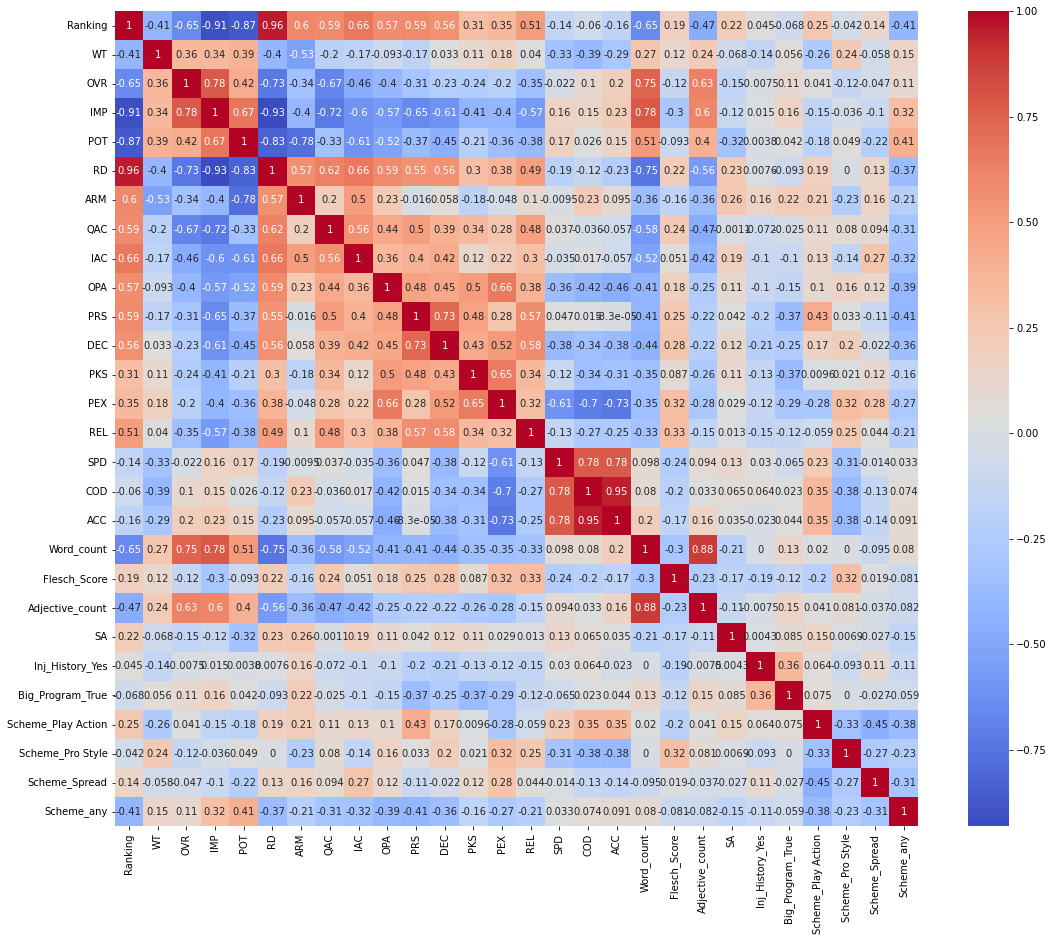

In [117]:
corr = X_train.corr(method='spearman')
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True , cmap='coolwarm')

### We can see form the correlation Matrix that they tend to write a Postive description when the POT of a player is high.

### Any feature that is driven form the scheme feature is not tell us much the only thing that is noticeable is in the play_Action scheme, players are faster and has less weight (WT) than any player in other scheme which make sense that scheme values the SPD in general.

### For the pro style we can see that it has some correlation to the arm feature, and if a play fits a pro style scheme he propl have less SPD.

### When the player has a high IMP or OVR the word count in the description is higher. which again make a lot of sense the higher OVR the player the more things you can say.

### We can remove the COD and ACC feature becase it has a high correlation with the SPD the kind of telling us the same thing in this DF.



In [118]:
# with the following function we can select highly corrlated features 
# it will remove the first feature that is correated with anything other feature 


def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [119]:
corr_features = correlation(X_train, 0.8)

In [120]:
len(set(corr_features))

6

In [121]:
corr_features

{'ACC', 'Adjective_count', 'COD', 'IMP', 'POT', 'RD'}

In [122]:
# droping colunms of the list of correlated features
corr_features.remove('POT') # 

# adding colunms in the list of correlated features
corr_features.add('SA')
corr_features.add('Flesch_Score')
corr_features.add('Scheme_Play Action')
corr_features.add('Scheme_Spread')
corr_features.add('Scheme_Pro Style')
corr_features.add('Ranking')



In [123]:
corr_features

{'ACC',
 'Adjective_count',
 'COD',
 'Flesch_Score',
 'IMP',
 'RD',
 'Ranking',
 'SA',
 'Scheme_Play Action',
 'Scheme_Pro Style',
 'Scheme_Spread'}





## also adding both the 'SPD' & 'COD' with the 'ACC' columns to the list becase the three of them are telling us the same thing with Play Extension 'PLX' with a high correlation with all of them. see cor

In [124]:
# The Ranking column has high corrlecion with both the RD and IMP columns 
corr_features.add('Ranking') 

In [125]:
corr_features

{'ACC',
 'Adjective_count',
 'COD',
 'Flesch_Score',
 'IMP',
 'RD',
 'Ranking',
 'SA',
 'Scheme_Play Action',
 'Scheme_Pro Style',
 'Scheme_Spread'}

In [126]:
df.var

<bound method NDFrame._add_numeric_operations.<locals>.var of     Ranking               Name      HT     WT       Class    OVR   IMP   POT  \
0       7.0       Bailey Zappe     6'3  213.0     SR (GR)   5.95  63.0  74.0   
1       1.0         Joe Burrow     6'4  216.0     SR (RS)  78.40  75.1  85.0   
2       4.0      Justin Fields     6'3  227.0          JR   6.51  69.0  90.0   
3      20.0  McKenzie Milton +    5'10  190.0  SR (RS x2)   4.80  51.0  70.0   
4      17.0        Collin Hill     6'4  213.0     SR (GR)   5.15  54.0  73.0   
5      19.0         Zac Thomas     6'1  205.0     SR (RS)   4.90  49.0  71.0   
6       7.0        Davis Mills     6'4  220.0          SR   6.05  58.0  78.0   
7       5.0       Malik Willis     6'0  220.0     JR (RS)   6.25  65.0  87.0   
8      20.0       Noah Johnson    5'10  199.0     SR (GR)   4.40  42.0  73.0   
9      16.0        Dustin Crum     6'3  207.0     SR (GR)   5.30  57.0  70.0   
10     19.0     Chris Oladokun     6'2  200.0     SR (GR) 

In [127]:
#importing the libraries

import pandas as pd
from sklearn.preprocessing import normalize


X_train.dtypes

Ranking               float64
HT                     object
WT                    float64
OVR                   float64
IMP                   float64
POT                   float64
RD                    float64
ARM                   float64
QAC                   float64
IAC                   float64
OPA                   float64
PRS                   float64
DEC                   float64
PKS                   float64
PEX                   float64
REL                   float64
SPD                   float64
COD                   float64
ACC                   float64
Word_count              int64
Flesch_Score          float64
Adjective_count         int64
SA                    float64
Inj_History_Yes         uint8
Big_Program_True        uint8
Scheme_Play Action      uint8
Scheme_Pro Style        uint8
Scheme_Spread           uint8
Scheme_any              uint8
dtype: object

In [128]:
# Selecting all the numeric features that are not 
data_scaled = pd.DataFrame(X_train, columns=['WT','OVR','IMP','POT','Word_count'])



In [129]:
data_scaled.head()

,WT,OVR,IMP,POT,Word_count
26,220.0,66.30,62.4,74.0,1256
32,225.0,75.30,69.5,87.0,984
14,230.0,5.88,60.0,77.0,808
30,205.0,62.00,59.0,68.0,673
57,195.0,5.00,53.0,69.0,654


In [130]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 26 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WT          48 non-null     float64
 1   OVR         48 non-null     float64
 2   IMP         48 non-null     float64
 3   POT         48 non-null     float64
 4   Word_count  48 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.2 KB


In [131]:
columns = data_scaled.columns

In [132]:
columns

Index(['WT', 'OVR', 'IMP', 'POT', 'Word_count'], dtype='object')

In [133]:
# Normalizing the data
normalize = normalize(data_scaled)

In [134]:
# Creating a data frame of the normalize data
data_scaled = pd.DataFrame(normalize)


# Storing the variance and name of variables
variance = data_scaled.var()


# Saving the names of variables having variance more than a threshold value
low_var_features = [ ]

for i in range(0,len(variance)):
    if variance[i]>=0.006: # Setting the threshold as 1%
        low_var_features.append(columns[i])

In [135]:
low_var_features

['WT']

In [136]:
corr_features.add('WT') 
corr_features.add('HT') 

In [137]:
corr_features

{'ACC',
 'Adjective_count',
 'COD',
 'Flesch_Score',
 'HT',
 'IMP',
 'RD',
 'Ranking',
 'SA',
 'Scheme_Play Action',
 'Scheme_Pro Style',
 'Scheme_Spread',
 'WT'}

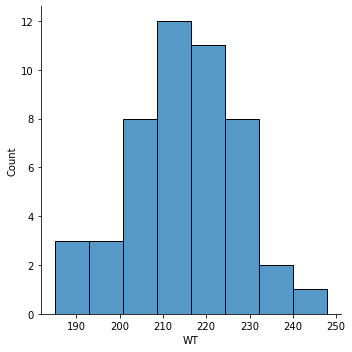

In [138]:
sns.displot(X_train['WT'])


### We can see that most of the player weight range between 205 to 225 pound.


### Droping the low variance feature can make our model better generalize an unseen data and the WT column is one of them.

### Why do we remove low variance features?
### Its underlying idea is that if a feature is constant (i.e. it has low variance), then it cannot be used for finding any interesting patterns and can be removed from the dataset.

In [139]:
X_train.drop(columns=corr_features,axis=1,inplace=True)
X_test.drop(columns=corr_features,axis=1,inplace=True)

In [140]:
X_train

,OVR,POT,ARM,QAC,IAC,OPA,PRS,DEC,PKS,PEX,REL,SPD,Word_count,Inj_History_Yes,Big_Program_True,Scheme_any
26,66.30,74.0,5.0,4.0,7.0,6.0,7.0,9.0,6.0,8.0,7.0,75.0,1256,0,0,0
32,75.30,87.0,2.0,3.0,4.0,3.0,6.0,7.0,4.0,3.0,4.0,84.0,984,0,0,1
14,5.88,77.0,3.0,5.0,5.0,5.0,6.0,7.0,7.0,6.0,6.0,74.0,808,0,0,1
30,62.00,68.0,7.0,3.0,8.0,6.0,10.0,9.0,5.0,5.0,10.0,82.0,673,0,0,0
57,5.00,69.0,10.0,9.0,10.0,6.0,8.0,5.0,6.0,5.0,4.0,86.0,654,0,0,0
3,4.80,70.0,9.0,7.0,8.0,6.0,7.0,7.0,5.0,5.0,4.0,83.0,410,1,1,0
11,5.40,75.0,4.0,9.0,11.0,6.0,9.0,9.0,7.0,5.0,8.0,80.0,399,0,1,0
25,62.70,74.0,3.0,5.0,4.0,6.0,9.0,9.0,8.0,8.0,8.0,75.0,769,0,0,0
53,5.99,73.0,6.0,5.0,6.0,5.0,6.0,9.0,6.0,6.0,5.0,73.0,1125,0,1,0
0,5.95,74.0,7.0,5.0,8.0,6.0,5.0,6.0,5.0,6.0,3.0,76.0,561,0,0,0


In [145]:
y_test.shape



(12,)

In [151]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
LR_model = LinearRegression()

# Fit the model to the data
LR_model.fit(X_train, y_train)

# Make predictions
y_pred = LR_model.predict(X_test)

print(y_pred)

[59.13214709 51.43047119 51.5136578  60.1948186  70.07808723 52.66371278
 59.25433074 64.50266779 52.10488445 58.67246051 64.07312082 73.23724104]


In [153]:
y_pred

array([59.13214709, 51.43047119, 51.5136578 , 60.1948186 , 70.07808723,
       52.66371278, 59.25433074, 64.50266779, 52.10488445, 58.67246051,
       64.07312082, 73.23724104])

In [163]:
y_pred = pd.DataFrame(y_pred)

In [156]:
y_test = pd.DataFrame(y_test)

In [174]:
y_test.shape

(12, 1)

In [175]:
y_pred.shape

(12, 1)

<AxesSubplot:xlabel='Rating', ylabel='0'>

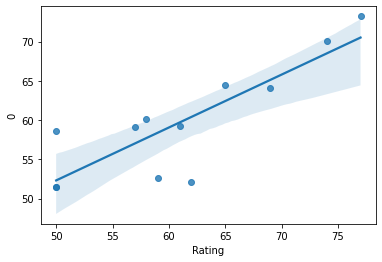

In [185]:
# Create scatterplot with regression line and confidence interval lines
sns.regplot(y_test, y_pred)

In [177]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.6836495543484671
RMSE: 4.865548103717577


In [186]:
# r^ 0.683
# RMSE 4.8655